In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading data
df1 = pd.read_csv('/content/ancona_data.csv')
df2 = pd.read_csv('/content/athens_data.csv')

# seeing sample of data
print(df1.head())
print(df2.head())

                  Date        NO2         O3       PM10     PM2.5   Latitude  \
0  2021-09-01 01:00:00   7.000000  53.000000  15.000000  4.000000  43.612386   
1  2021-09-01 01:00:00   8.000000        NaN   9.000000       NaN  43.527982   
2  2021-09-01 01:00:00   9.035176  49.232338  10.681684  7.700312  43.450000   
3  2021-09-01 01:00:00  10.292098  51.336113  10.310384  6.732396  43.550000   
4  2021-09-01 01:00:00   8.348963  39.351303  10.273862  7.066792  43.550000   

   Longitude            station_name  Wind-Speed (U)  Wind-Speed (V)  \
0  13.510830        Ancona Citadella       -0.528286       -0.987673   
1  13.246672                    Jesi       -0.529657       -0.987282   
2  13.250000  Ancona CAMS Station 11       -0.529798       -0.987225   
3  13.450000   Ancona CAMS Station 8       -0.528619       -0.987565   
4  13.150000   Ancona CAMS Station 5       -0.530069       -0.987179   

   Dewpoint Temp  Soil Temp  Total Percipitation  Vegitation (High)  \
0      63.56378

In [3]:
columns_ord = df1.columns

# Re-ordering the columns of 2nd dataframe as 1st dataframe
df2 = df2[columns_ord]

In [4]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417626 entries, 0 to 417625
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 417626 non-null  object 
 1   NO2                  409848 non-null  float64
 2   O3                   392823 non-null  float64
 3   PM10                 389767 non-null  float64
 4   PM2.5                372508 non-null  float64
 5   Latitude             417626 non-null  float64
 6   Longitude            417626 non-null  float64
 7   station_name         417626 non-null  object 
 8   Wind-Speed (U)       417626 non-null  float64
 9   Wind-Speed (V)       417626 non-null  float64
 10  Dewpoint Temp        417626 non-null  float64
 11  Soil Temp            417626 non-null  float64
 12  Total Percipitation  417626 non-null  float64
 13  Vegitation (High)    417626 non-null  float64
 14  Vegitation (Low)     417626 non-null  float64
 15  Temp             

In [5]:
# converting date column into datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])

# dropping unnecessary columns
df1 = df1.drop(columns=['id', 'code'])

df2 = df2.drop(columns=['id', 'code'])

In [6]:
df1['Date'].info()
df2['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 417626 entries, 0 to 417625
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
417626 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.2 MB
<class 'pandas.core.series.Series'>
RangeIndex: 1726464 entries, 0 to 1726463
Series name: Date
Non-Null Count    Dtype         
--------------    -----         
1726464 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 13.2 MB


In [7]:
df1.head(5)

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2021-09-01 01:00:00,7.000000,53.000000,15.000000,4.000000,43.612386,13.510830,Ancona Citadella,-0.528286,-0.987673,63.563788,66.476667,0.0,3.184390,2.847654,66.075624,85.422435
1,2021-09-01 01:00:00,8.000000,NaN,9.000000,NaN,43.527982,13.246672,Jesi,-0.529657,-0.987282,64.894507,67.803820,0.0,3.179204,2.851910,67.392994,85.502078
2,2021-09-01 01:00:00,9.035176,49.232338,10.681684,7.700312,43.450000,13.250000,Ancona CAMS Station 11,-0.529798,-0.987225,65.123477,68.032686,0.0,3.176792,2.852830,67.622493,85.500013
3,2021-09-01 01:00:00,10.292098,51.336113,10.310384,6.732396,43.550000,13.450000,Ancona CAMS Station 8,-0.528619,-0.987565,63.943511,66.855648,0.0,3.181947,2.849007,66.453195,85.435906
4,2021-09-01 01:00:00,8.348963,39.351303,10.273862,7.066792,43.550000,13.150000,Ancona CAMS Station 5,-0.530069,-0.987179,65.208544,68.116622,0.0,3.179280,2.852743,67.701531,85.534001


In [8]:
df2.head()


,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2020-05-01,3.479941,76.28401,8.101824,6.200135,38.15,23.55,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812
1,2020-05-01,17.563843,74.39110,10.520411,7.836725,37.85,23.75,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731
2,2020-05-01,2.892315,74.56569,8.587352,6.306404,38.15,23.65,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317
3,2020-05-01,17.196804,67.90412,10.917974,8.207660,37.85,23.85,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915
4,2020-05-01,15.817172,67.63471,11.353168,8.217451,37.85,23.95,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202


In [9]:
df1.isnull().sum().sort_values(ascending=True)

,0
Date,0
station_name,0
Longitude,0
Latitude,0
Soil Temp,0
Dewpoint Temp,0
Wind-Speed (V),0
Wind-Speed (U),0
Total Percipitation,0
Vegitation (High),0


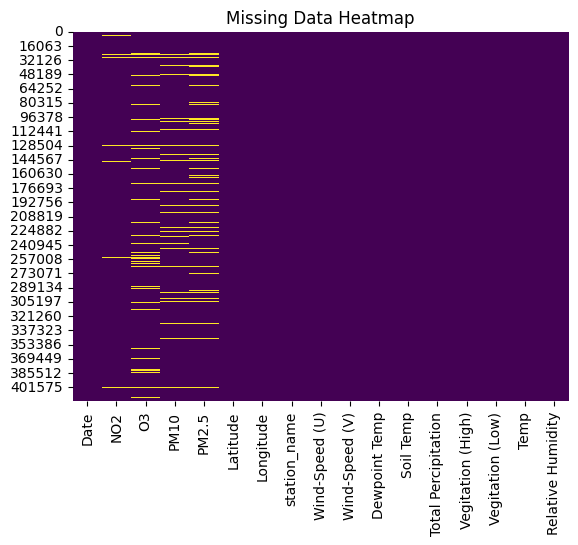

In [10]:
# Visualize missing data (optional)
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

In [11]:
# Function to fill missing values with upper 3 and down 3 values mean for df1
def fill_missing_values(df1, column):
    for i in range(len(df1)):
        if pd.isna(df1[column][i]):
            up_sum = 0
            up_count = 0
            down_sum = 0
            down_count = 0
            j = 1
            k = 1

            while up_count < 3 and i - j >= 0:
                if not pd.isna(df1[column][i - j]):
                    up_sum += df1[column][i - j]
                    up_count += 1
                j += 1

            while down_count < 3 and i + k < len(df1):
                if not pd.isna(df1[column][i + k]):
                    down_sum += df1[column][i + k]
                    down_count += 1
                k += 1

            if up_count + down_count > 0:
                df1.loc[i, column] = (up_sum + down_sum) / (up_count + down_count)

# Columns to fill
columns_to_fill = ['NO2', 'O3', 'PM10', 'PM2.5']

# Fill missing values for each column
for column in columns_to_fill:
    fill_missing_values(df1, column)

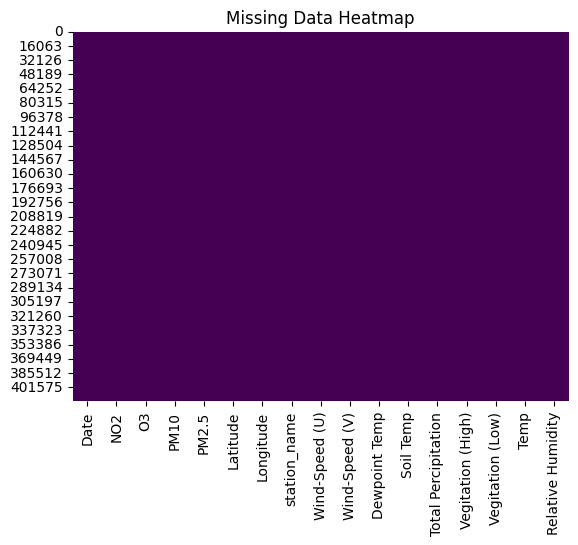

In [12]:
# Visualize missing data (optional)
sns.heatmap(df1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

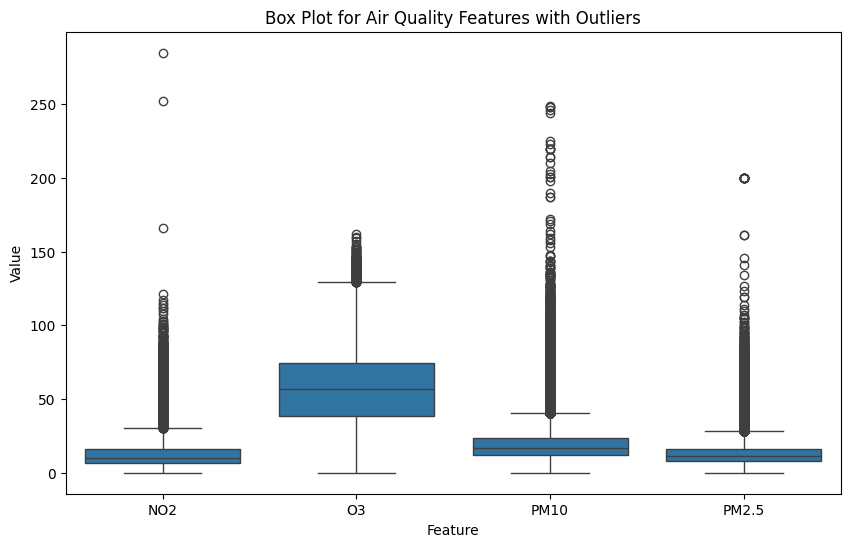

In [13]:
# Melt the DataFrame to long format
df_melted = df1.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity'],
                     value_vars=['NO2', 'O3', 'PM10', 'PM2.5'],
                     var_name='Feature',
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature')
plt.ylabel('Value')

plt.show()

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1726464 entries, 0 to 1726463
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Date                 datetime64[ns]
 1   NO2                  float64       
 2   O3                   float64       
 3   PM10                 float64       
 4   PM2.5                float64       
 5   Latitude             float64       
 6   Longitude            float64       
 7   station_name         object        
 8   Wind-Speed (U)       float64       
 9   Wind-Speed (V)       float64       
 10  Dewpoint Temp        float64       
 11  Soil Temp            float64       
 12  Total Percipitation  float64       
 13  Vegitation (High)    float64       
 14  Vegitation (Low)     float64       
 15  Temp                 float64       
 16  Relative Humidity    float64       
dtypes: datetime64[ns](1), float64(15), object(1)
memory usage: 223.9+ MB


In [15]:
# checking Null values in dataframe 2
df2.isnull().sum().sort_values(ascending=True)

,0
Date,0
PM10,0
Latitude,0
PM2.5,0
Longitude,0
station_name,0
Temp,7565
Wind-Speed (U),8573
Soil Temp,8573
Total Percipitation,8573


In [16]:
# Function to fill missing values with upper 3 and down 3 values mean of df2
def fill_missing_values(df2, column):
    for i in range(len(df2)):
        if pd.isna(df2[column][i]):
            up_sum = 0
            up_count = 0
            down_sum = 0
            down_count = 0
            j = 1
            k = 1

            while up_count < 3 and i - j >= 0:
                if not pd.isna(df2[column][i - j]):
                    up_sum += df2[column][i - j]
                    up_count += 1
                j += 1

            while down_count < 3 and i + k < len(df2):
                if not pd.isna(df2[column][i + k]):
                    down_sum += df2[column][i + k]
                    down_count += 1
                k += 1

            if up_count + down_count > 0:
                df2.loc[i, column] = (up_sum + down_sum) / (up_count + down_count)

# Columns to fill
columns_to_fill = ['Temp', 'Vegitation (Low)', 'Vegitation (High)', 'Total Percipitation',
    'Soil Temp', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp','Relative Humidity', 'NO2', 'O3']

# Fill missing values for each column
for column in columns_to_fill:
    fill_missing_values(df2, column)

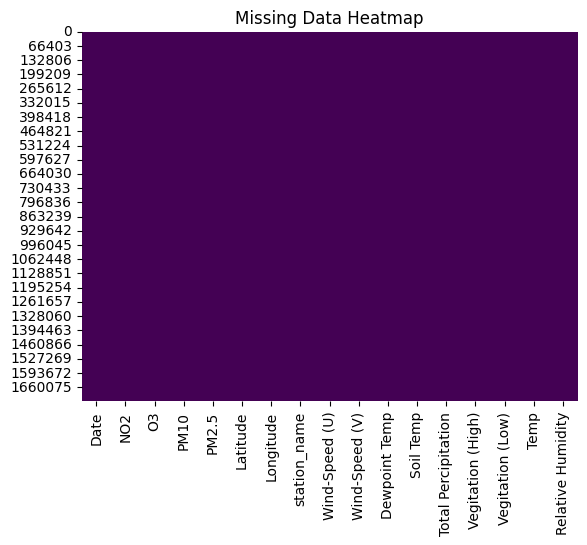

In [17]:
# Visualize missing data (optional)
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

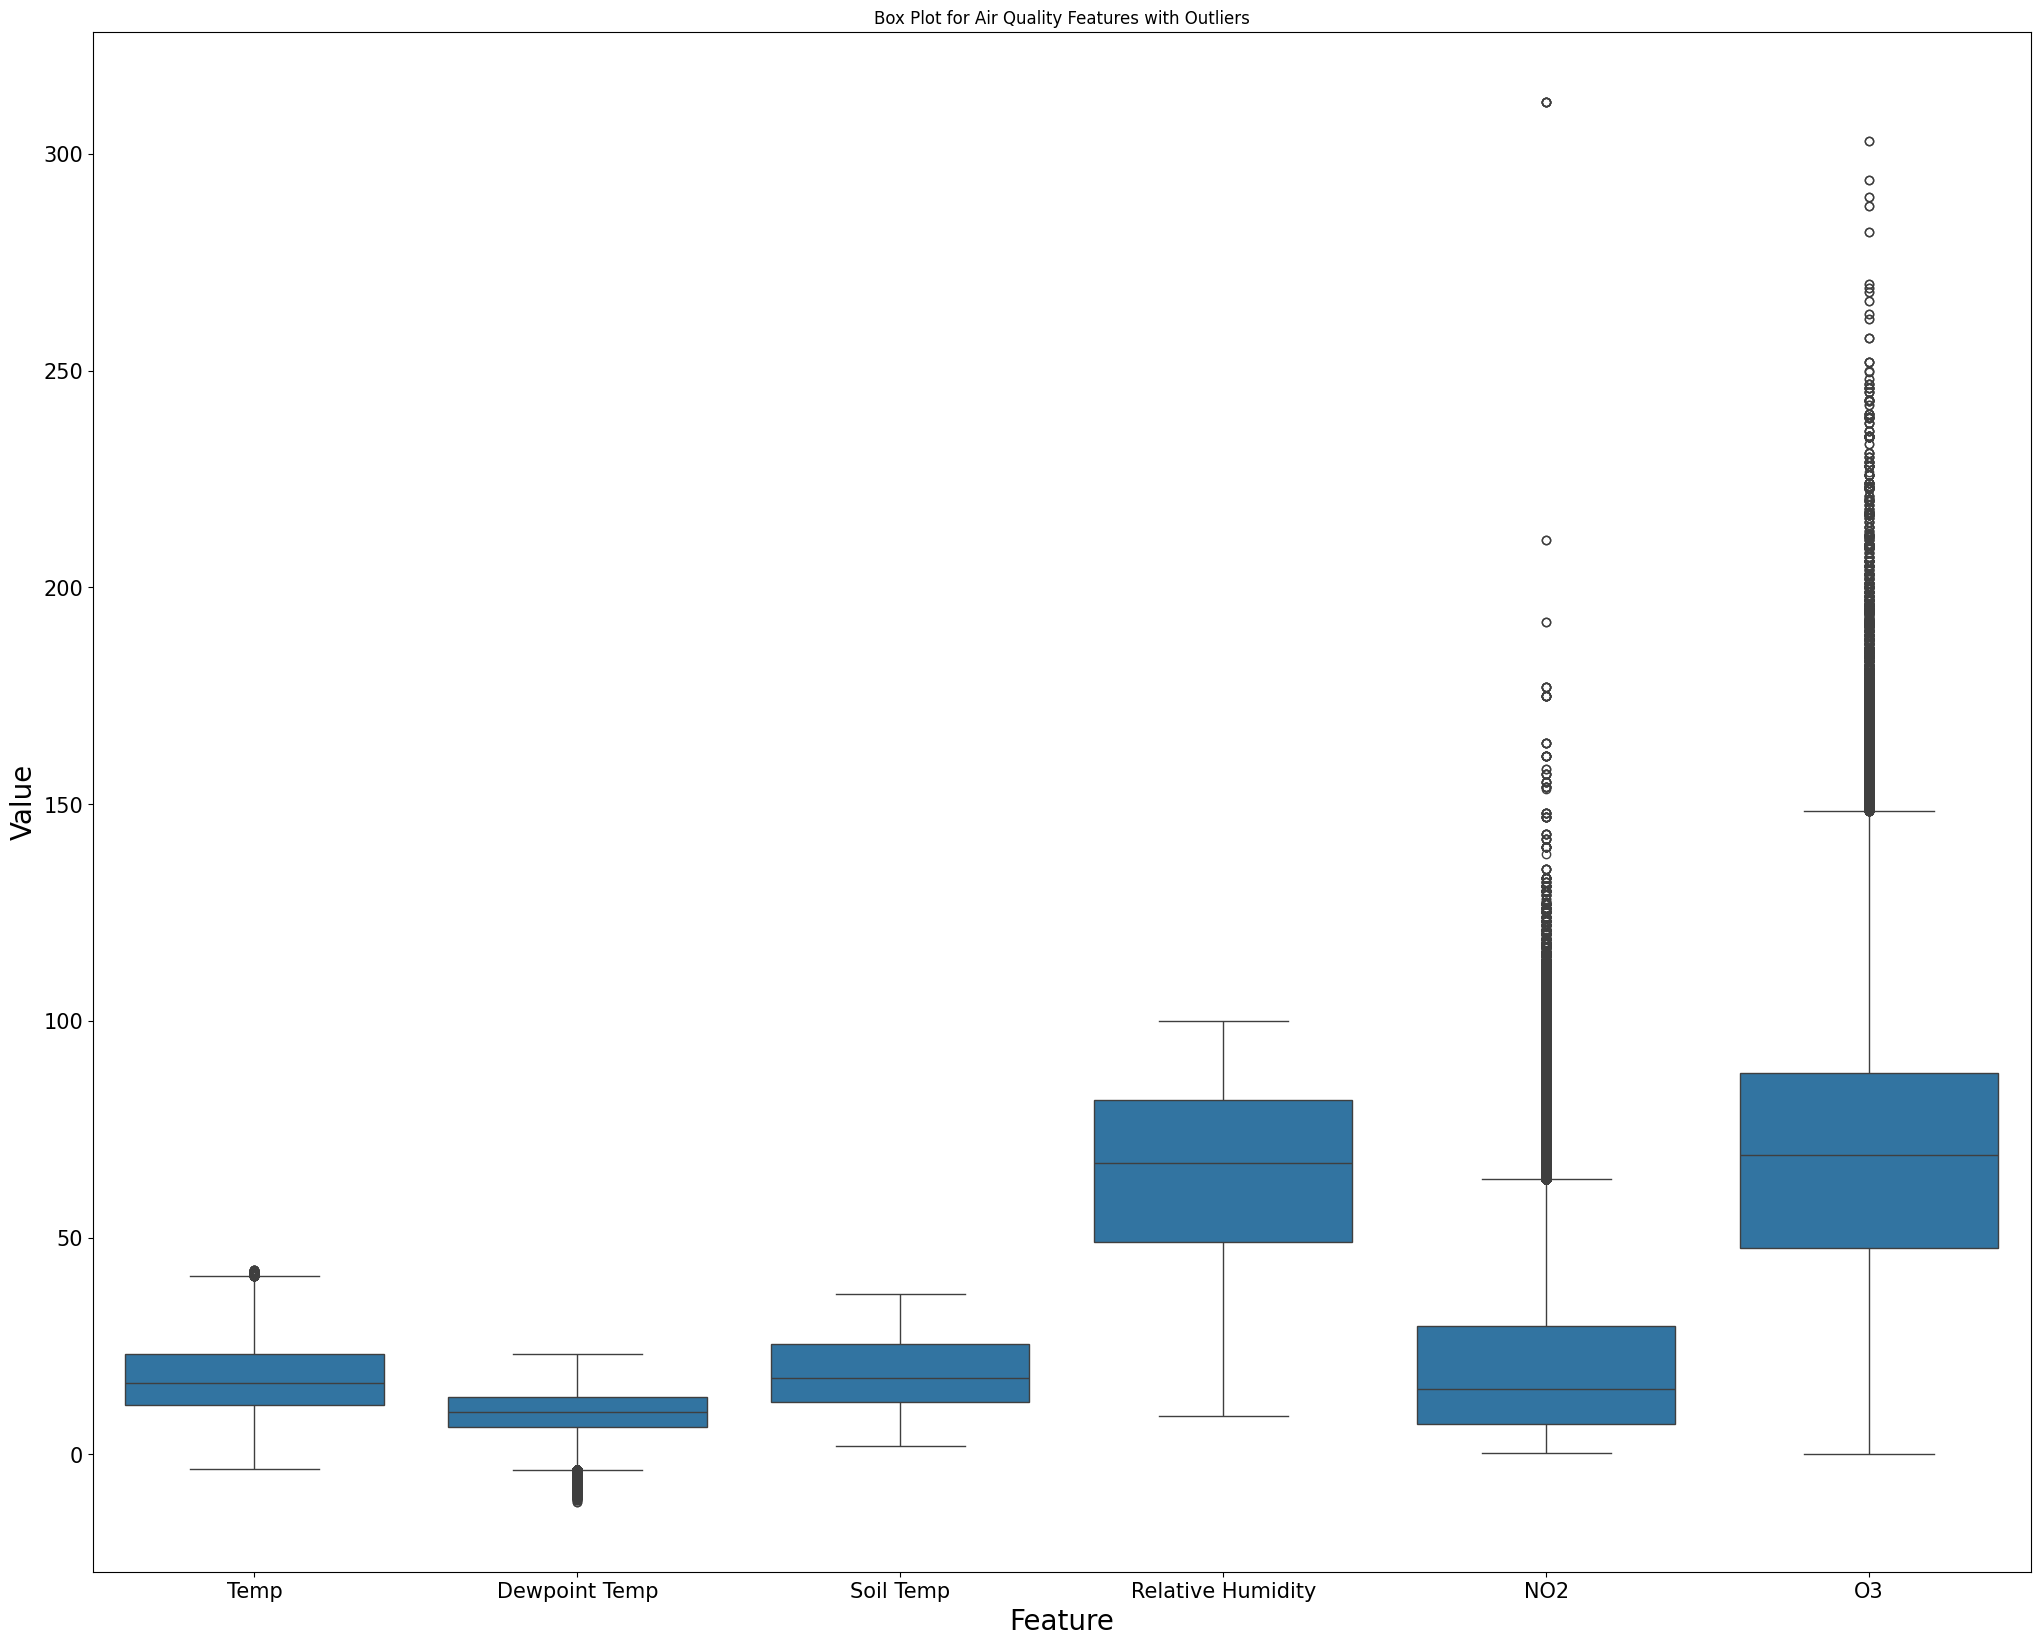

In [18]:
# Melt the DataFrame to long format
df_melted = df2.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name'],
                     value_vars=['Temp', 'Dewpoint Temp', 'Soil Temp', 'Relative Humidity', 'NO2', 'O3'],
                     var_name='Feature',
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(25, 20))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

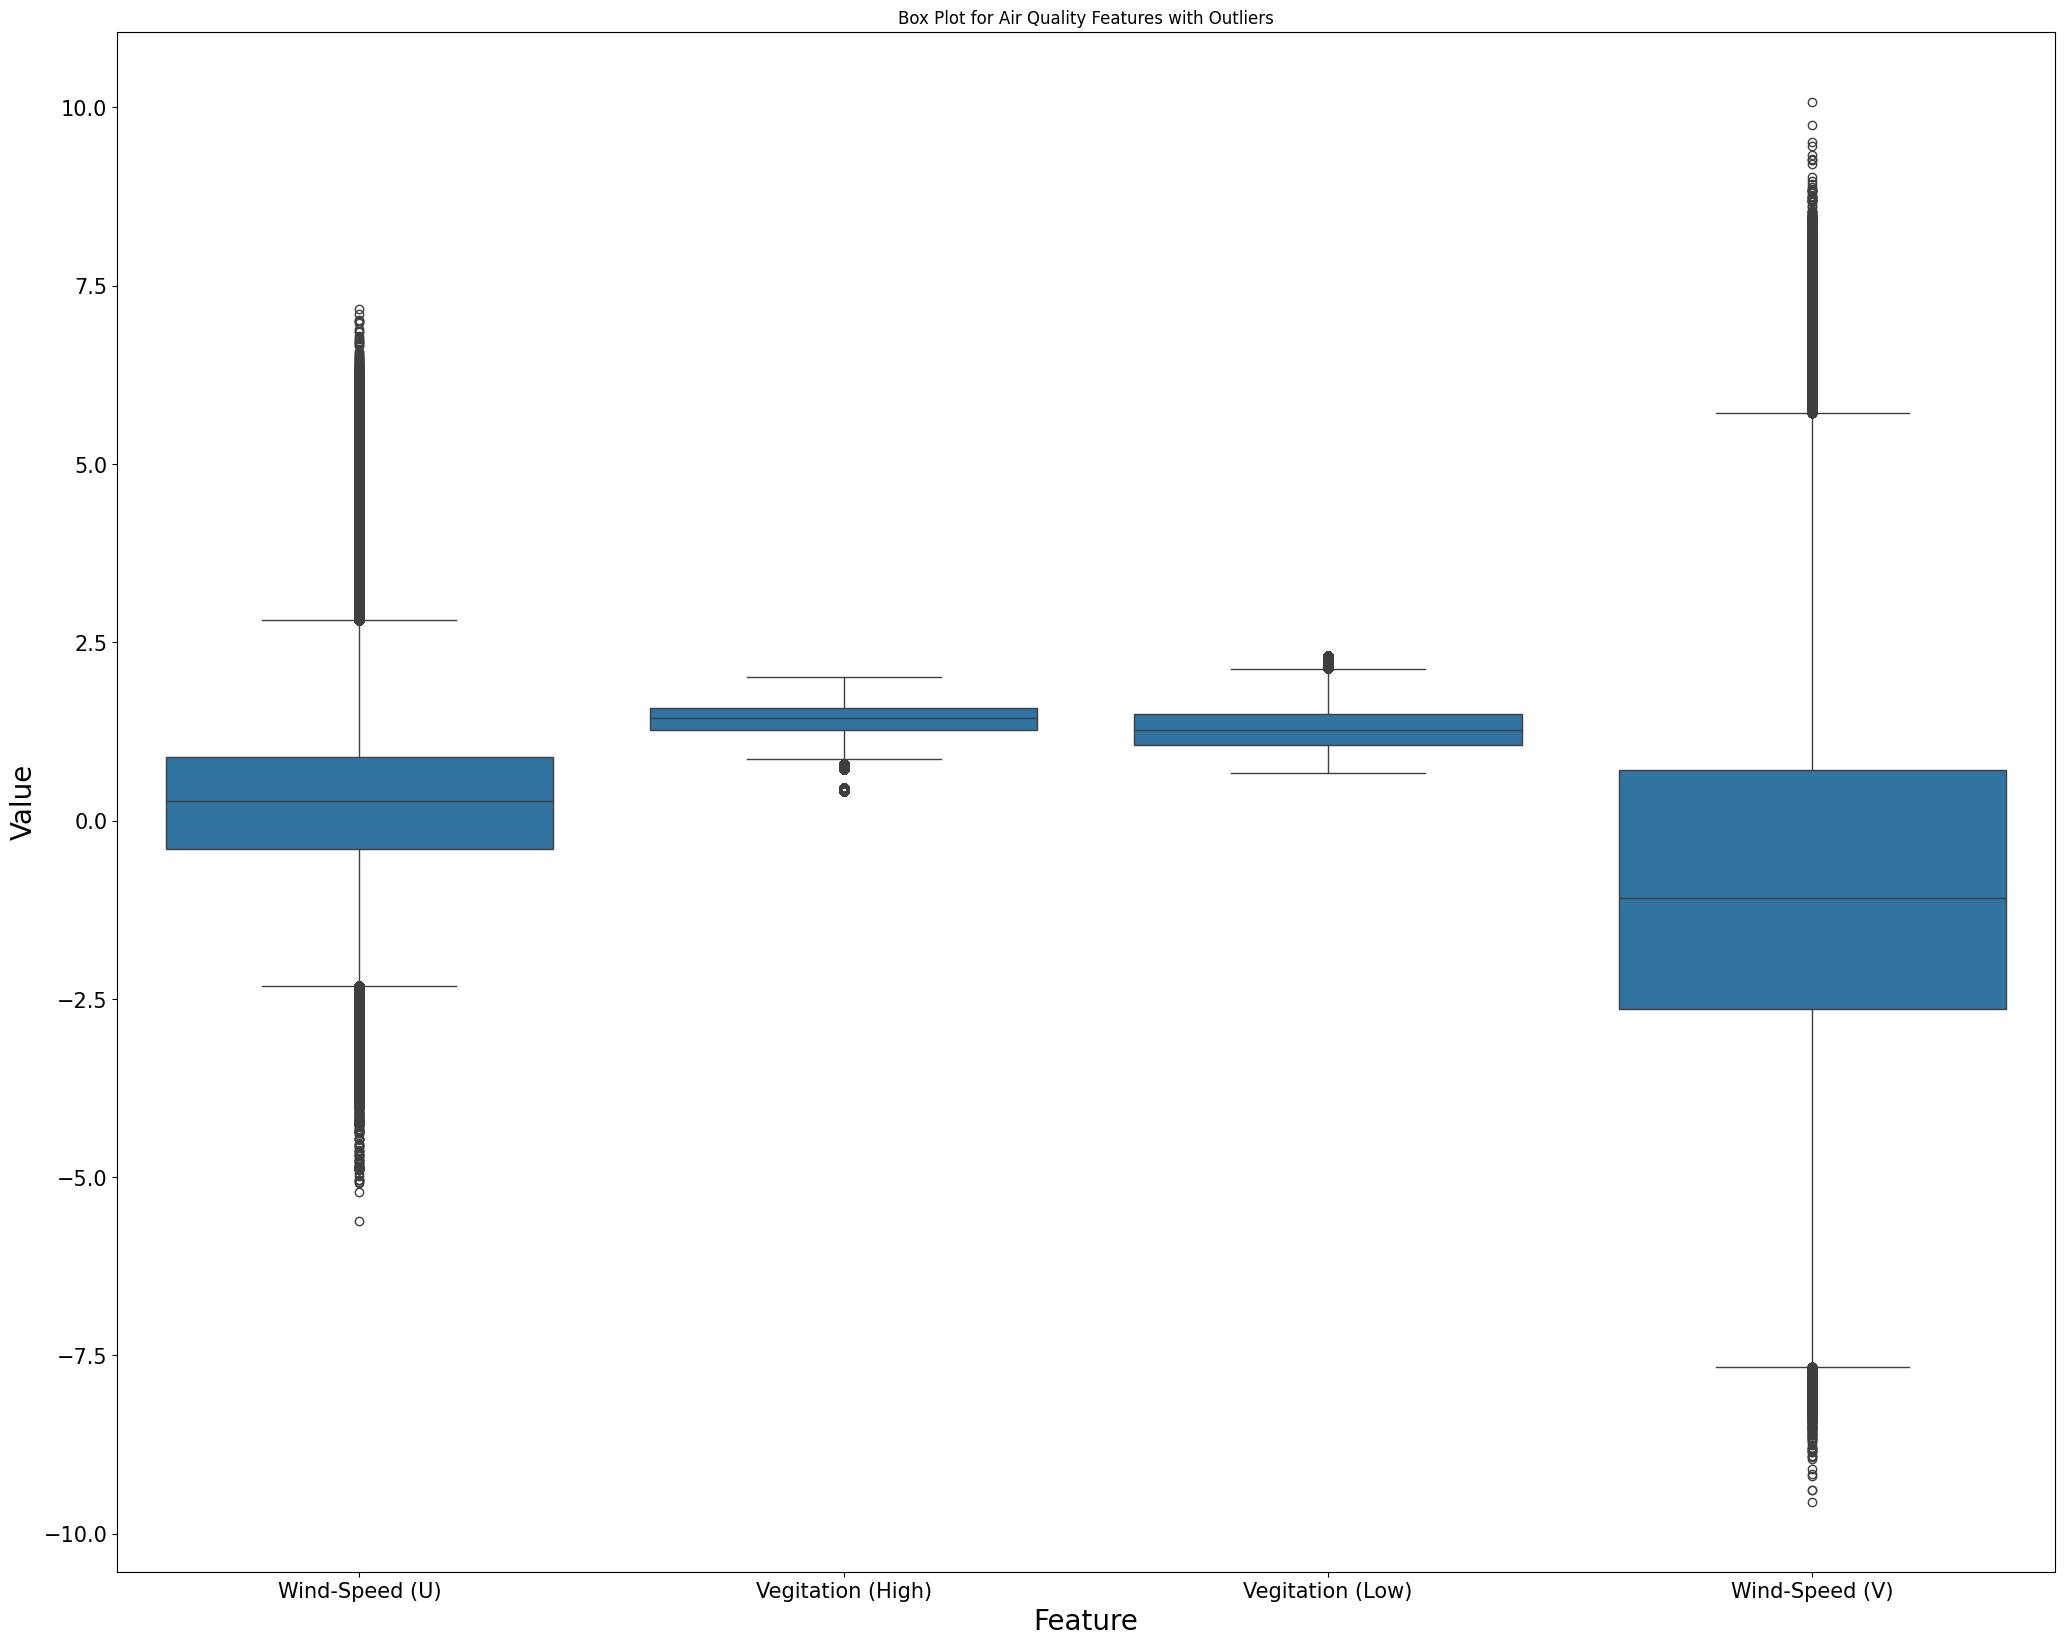

In [19]:
# Melt the DataFrame to long format
df_melted = df2.melt(id_vars=['Date', 'Latitude', 'Longitude', 'station_name'],
                     value_vars=['Wind-Speed (U)', 'Vegitation (High)', 'Vegitation (Low)', 'Wind-Speed (V)'],
                     var_name='Feature',
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(25, 20))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

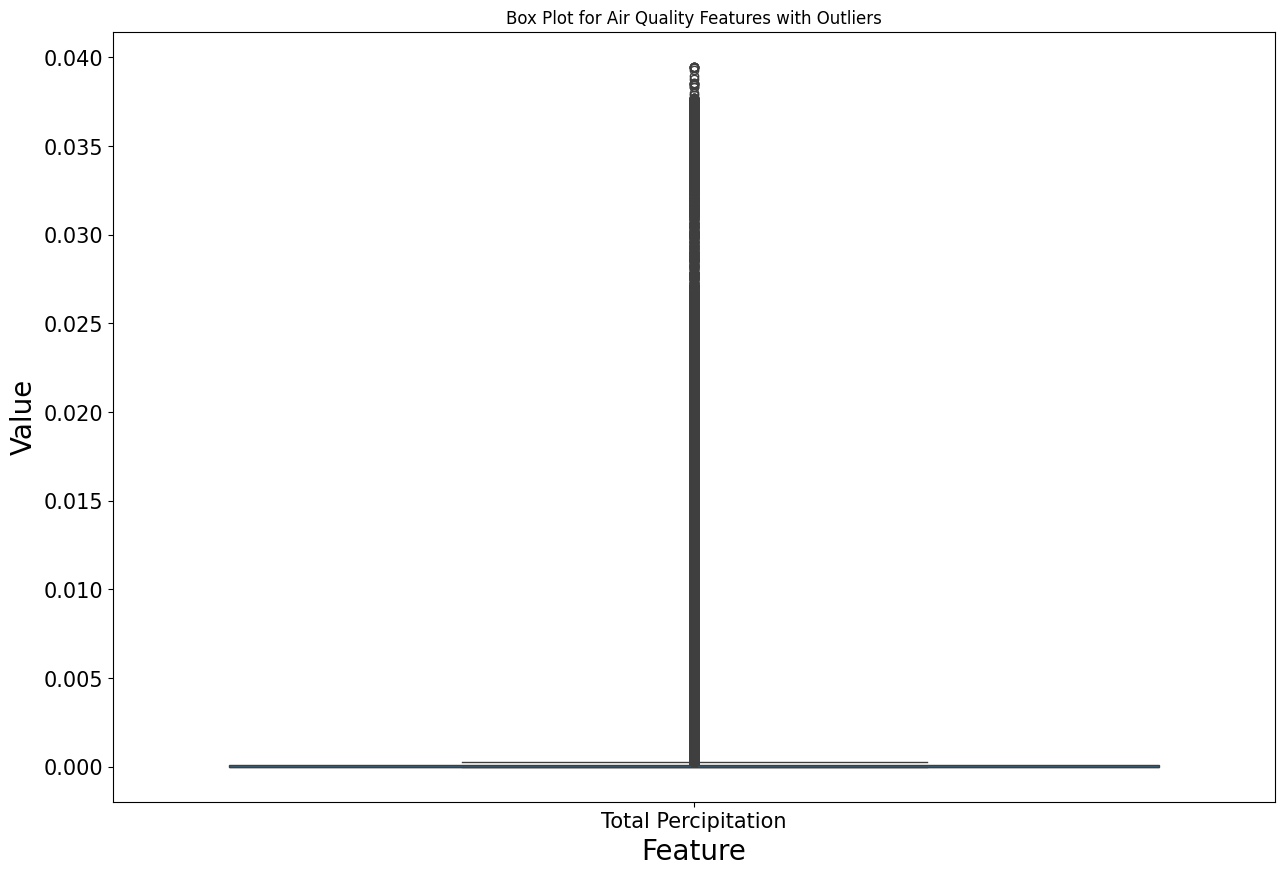

In [20]:

# Melt the DataFrame to long format
df_melted = df2.melt(value_vars=['Total Percipitation'],
                     var_name='Feature',
                     value_name='Value')

# Create a box plot
plt.figure(figsize=(15, 10))
sns.boxplot(x='Feature', y='Value', data=df_melted, showfliers=True)
plt.title('Box Plot for Air Quality Features with Outliers')
plt.xlabel('Feature', size = 20)
plt.ylabel('Value', size = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [21]:
df = pd.concat([df1, df2])

In [22]:
# Sorting the DataFrame by the 'Date' column
df = df.sort_values(by='Date').reset_index(drop=True)


df

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity
0,2020-05-01 00:00:00,19.182842,65.154610,15.043911,11.628475,38.050000,23.950000,Athens CAMS station 19,1.666157,-0.647274,9.679053,17.641805,0.000050,1.697447,1.353098,13.618914,77.171889
1,2020-05-01 00:00:00,7.386327,71.165230,11.410466,7.889841,38.150000,23.950000,Athens CAMS station 14,1.608547,-0.493469,9.436499,17.339710,0.000050,1.588538,1.109098,13.192152,78.034421
2,2020-05-01 00:00:00,10.890930,69.889880,10.032639,8.453507,38.050000,23.550000,Athens CAMS station 15,1.931901,-0.955598,10.870682,18.002995,0.000038,1.918372,1.518000,13.861360,82.222886
3,2020-05-01 00:00:00,12.530855,63.666874,11.838625,9.954234,38.050000,23.650000,Athens CAMS station 16,1.825504,-0.864969,10.444918,17.745293,0.000042,1.628801,1.479182,13.339142,82.714797
4,2020-05-01 00:00:00,53.000000,1.000000,131.000000,13.000000,38.018690,23.810574,PANACEA_005,1.794912,-0.841185,9.950662,17.742396,0.000045,1.481709,0.860578,14.039602,76.442301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144085,2023-10-31 23:00:00,7.000000,59.000000,11.988403,3.000000,43.623906,13.392558,Falconara Alta,-0.578384,-0.669120,10.854955,12.754717,0.011400,2.901160,2.680774,12.481050,89.845833
2144086,2023-10-31 23:00:00,11.118244,50.137924,12.163123,7.220167,43.650000,13.450000,Ancona CAMS Station 3,-0.577543,-0.669832,10.854736,12.752656,0.011403,2.902311,2.679673,12.481108,89.844242
2144087,2023-10-31 23:00:00,11.000000,43.742821,15.000000,4.000000,43.527982,13.246672,Jesi,-0.580880,-0.667032,10.855416,12.760298,0.011396,2.897558,2.684010,12.480573,89.851236
2144088,2023-10-31 23:00:00,9.705607,48.170746,10.697131,7.280790,43.450000,13.450000,Ancona CAMS Station 13,-0.578659,-0.669225,10.851639,12.745957,0.011431,2.896195,2.681406,12.475130,89.861075


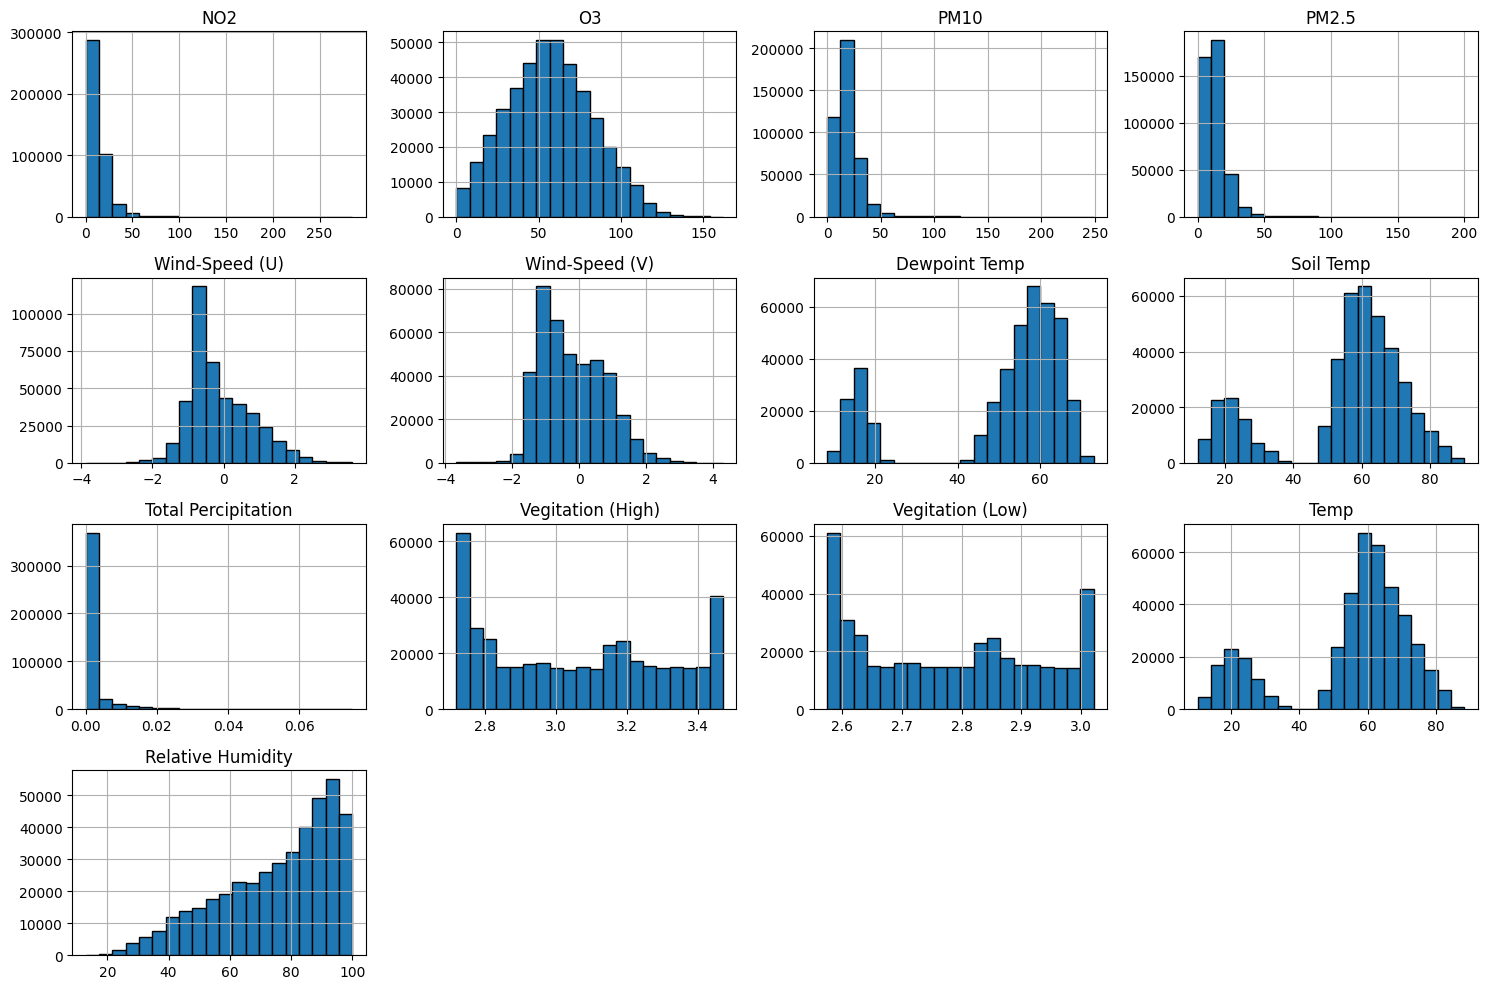

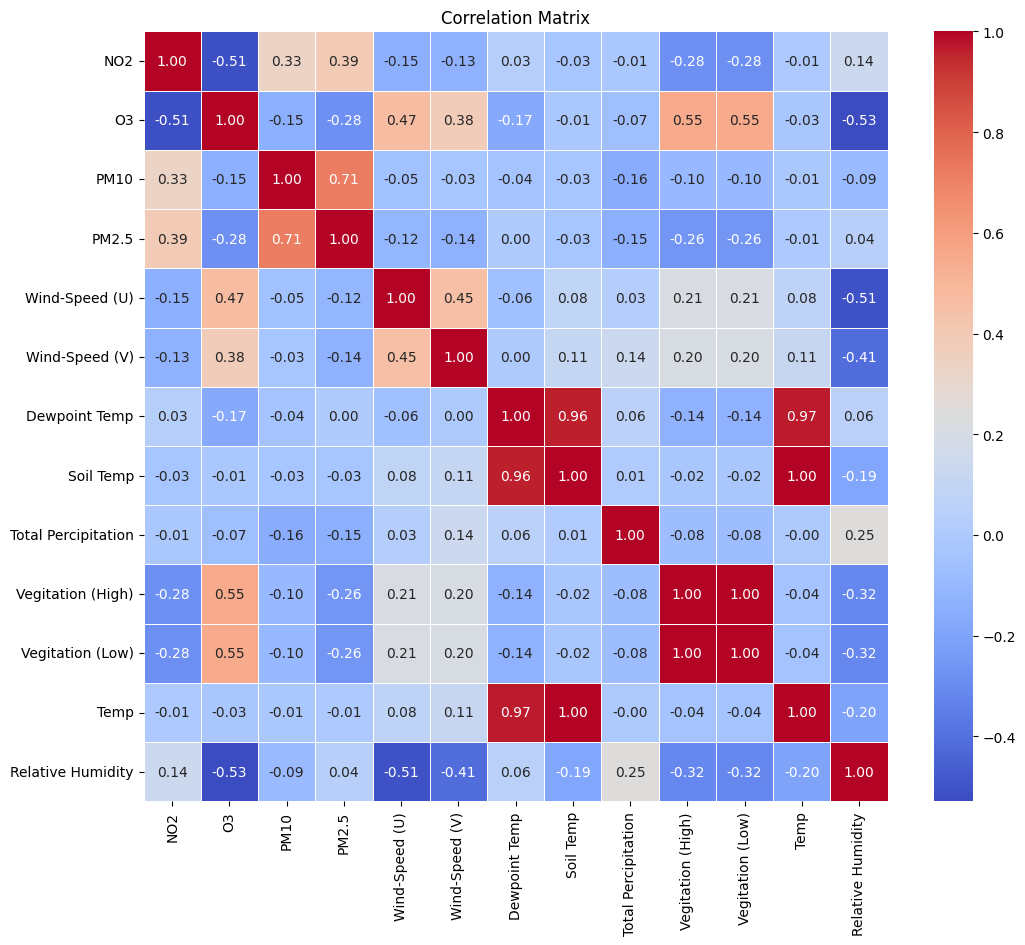

In [23]:
# Convert the 'Date' column to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Plot histograms for each numerical variable
numerical_columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity']
df1[numerical_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Generate and plot the correlation matrix

correlation_matrix = df1[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Convert the 'Date' column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# Set the 'Date' column as the index
df2.set_index('Date', inplace=True)



In [25]:
df_vis = df2

# Ensure all numerical columns are converted to numeric types where necessary
numerical_columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'Latitude', 'Longitude', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity']
df_vis[numerical_columns] = df_vis[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Resample the data to daily averages for numerical columns only
daily_data = df_vis[numerical_columns].resample('D').mean()



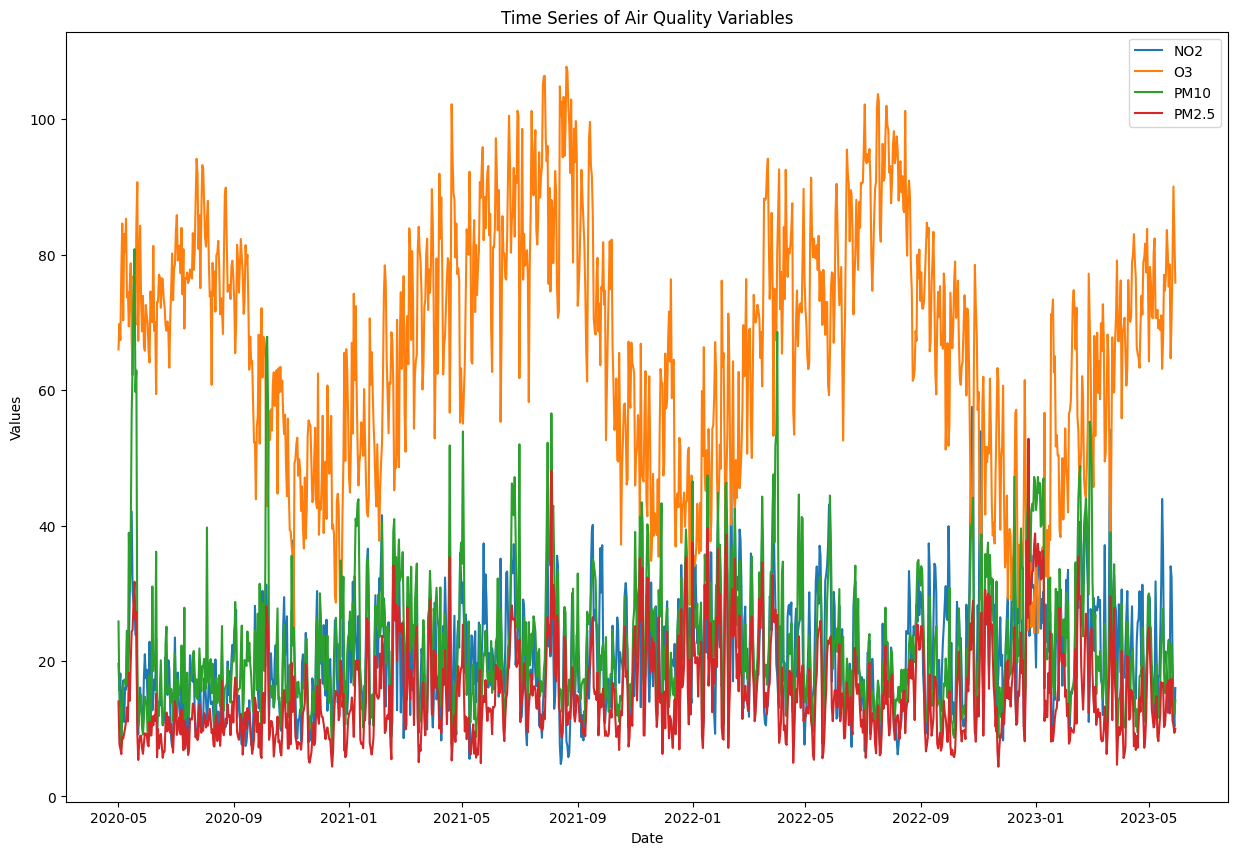

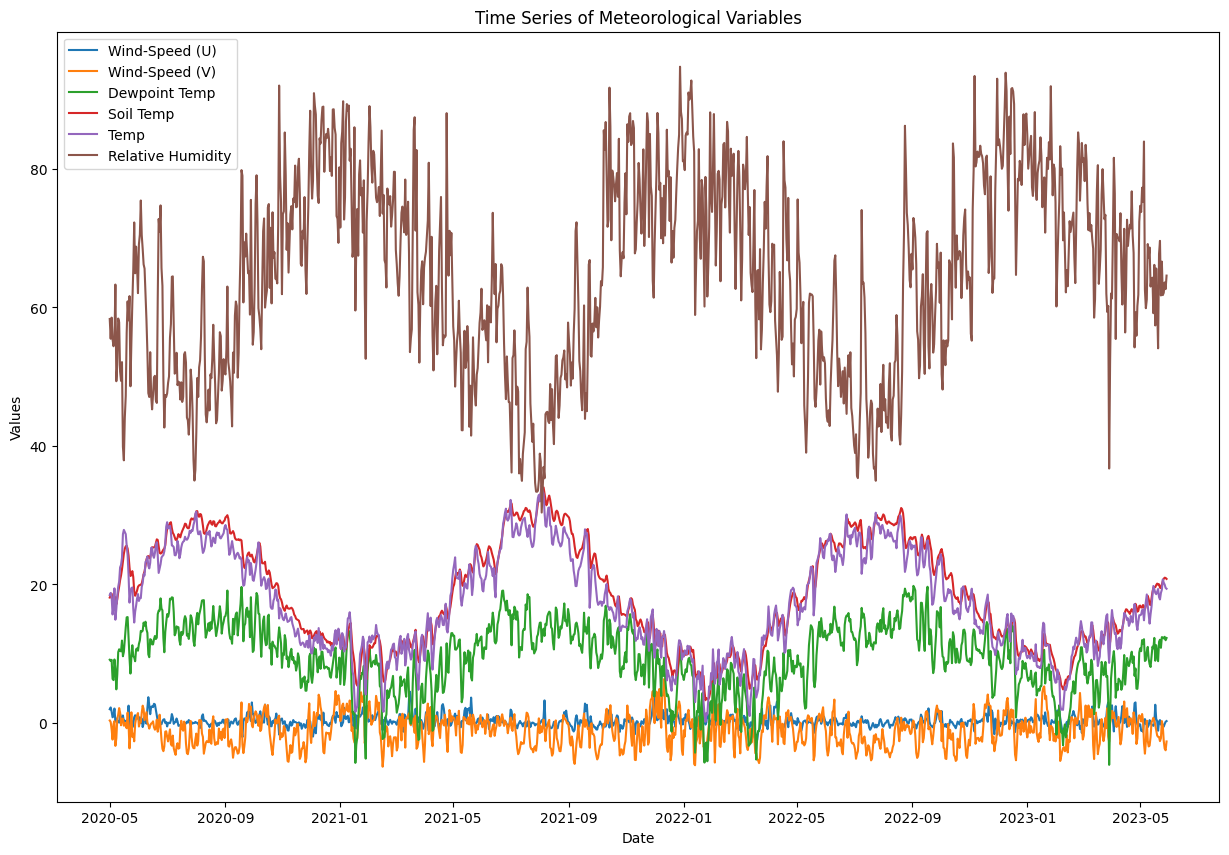

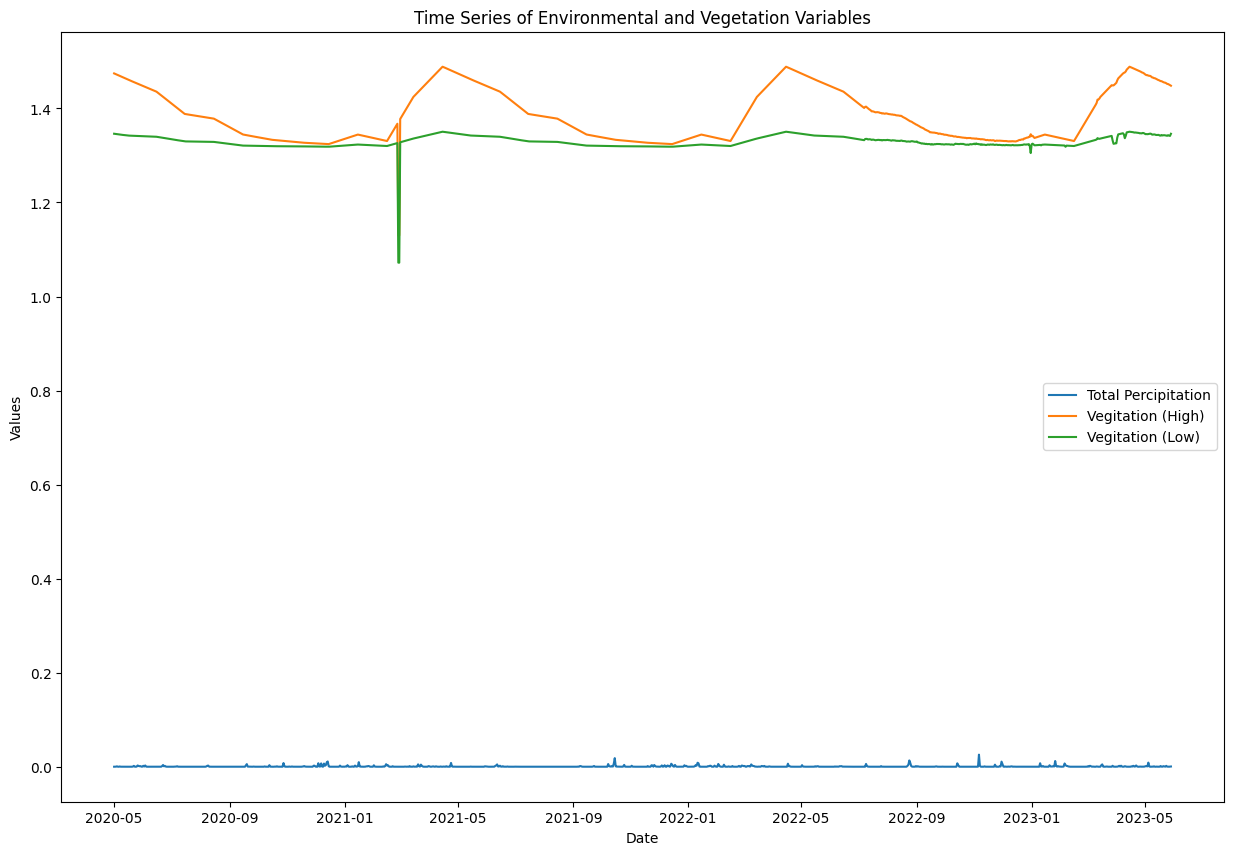

In [26]:
# Plot 1: Time Series Plot for Air Quality Variables
air_quality_vars = ['NO2', 'O3', 'PM10', 'PM2.5']

plt.figure(figsize=(15, 10))
for column in air_quality_vars:
    plt.plot(daily_data.index, daily_data[column], label=column)
plt.legend()
plt.title('Time Series of Air Quality Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

# Plot 2: Time Series Plot for Meteorological Variables
meteorological_vars = ['Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Temp', 'Relative Humidity']

plt.figure(figsize=(15, 10))
for column in meteorological_vars:
    plt.plot(daily_data.index, daily_data[column], label=column)
plt.legend()
plt.title('Time Series of Meteorological Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

# Plot 3: Time Series Plot for Environmental and Vegetation Variables
environmental_vars = ['Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)']

plt.figure(figsize=(15, 10))
for column in environmental_vars:
    plt.plot(daily_data.index, daily_data[column], label=column)
plt.legend()
plt.title('Time Series of Environmental and Vegetation Variables')
plt.xlabel('Date')
plt.ylabel('Values')
plt.show()

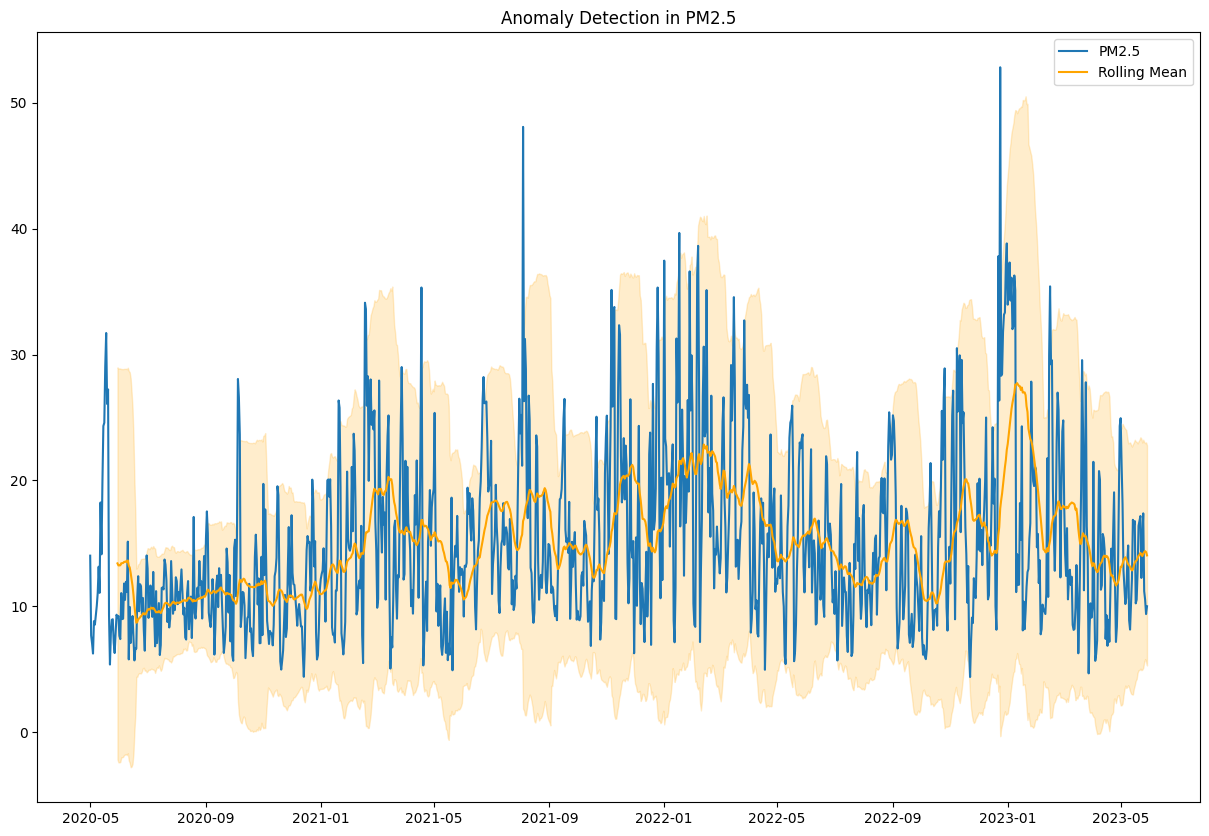

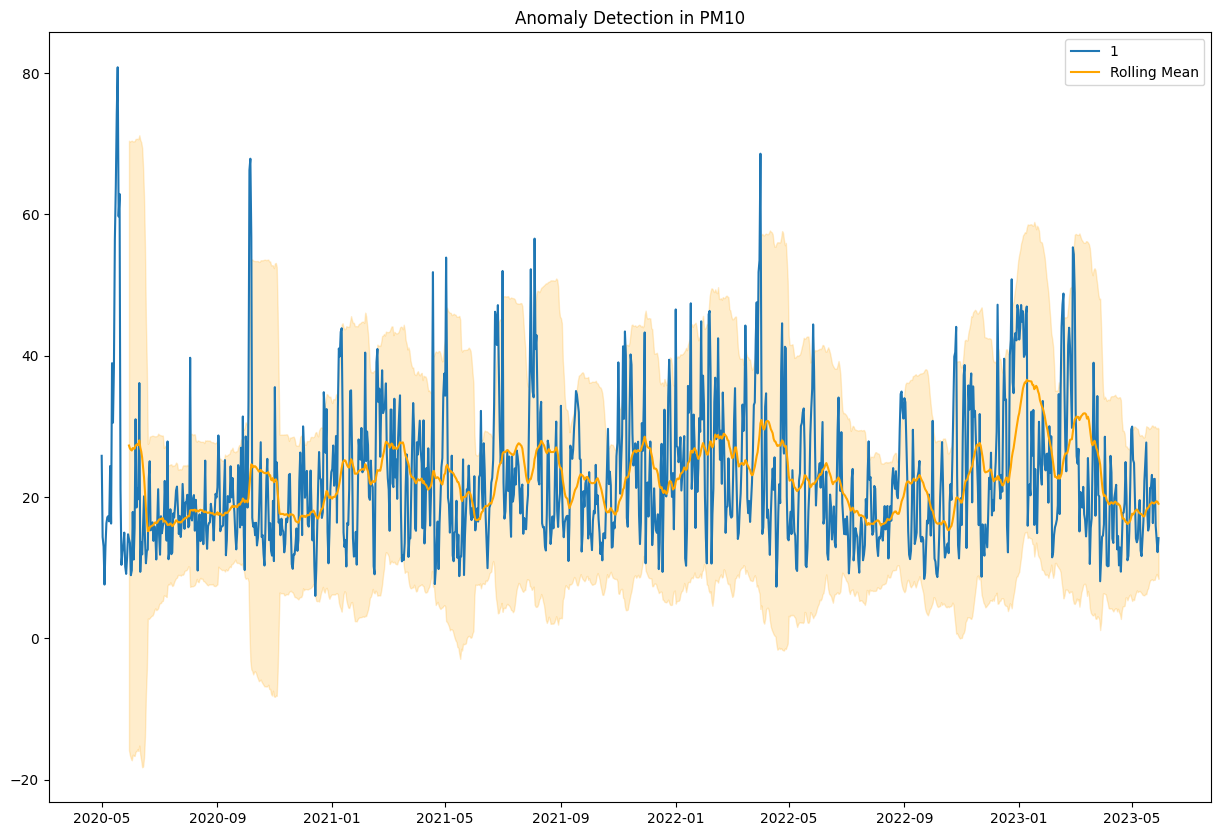

In [27]:
rolling_mean = daily_data.rolling(window=30).mean()
rolling_std = daily_data.rolling(window=30).std()

plt.figure(figsize=(15, 10))
plt.plot(daily_data.index, daily_data['PM2.5'], label='PM2.5')
plt.plot(rolling_mean.index, rolling_mean['PM2.5'], label='Rolling Mean', color='orange')
plt.fill_between(rolling_std.index, rolling_mean['PM2.5'] - (2 * rolling_std['PM2.5']), rolling_mean['PM2.5'] + (2 * rolling_std['PM2.5']), color='orange', alpha=0.2)
plt.legend()
plt.title('Anomaly Detection in PM2.5')
plt.show()

plt.figure(figsize=(15, 10))
plt.plot(daily_data.index, daily_data['PM10'], label='1')
plt.plot(rolling_mean.index, rolling_mean['PM10'], label='Rolling Mean', color='orange')
plt.fill_between(rolling_std.index, rolling_mean['PM10'] - (2 * rolling_std['PM10']), rolling_mean['PM10'] + (2 * rolling_std['PM10']), color='orange', alpha=0.2)
plt.legend()
plt.title('Anomaly Detection in PM10')
plt.show()

In [28]:
# Define breakpoints for each pollutant
breakpoints = {
    'PM2.5': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150),
              (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
    'PM10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150),
             (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
    'NO2': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150),
            (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
    'O3': [(0.000, 0.054, 0, 50), (0.055, 0.070, 51, 100), (0.071, 0.085, 101, 150),
           (0.086, 0.105, 151, 200), (0.106, 0.200, 201, 300)]
}

# Function to calculate sub-index for a given pollutant
def calc_sub_index(concentration, breakpoints):
    for (C_lo, C_hi, I_lo, I_hi) in breakpoints:
        if C_lo <= concentration <= C_hi:
            return ((I_hi - I_lo) / (C_hi - C_lo)) * (concentration - C_lo) + I_lo
    return np.nan

# Function to calculate AQI from pollutant concentrations
def calculate_aqi(row):
    sub_indices = []
    for pollutant in ['PM2.5', 'PM10', 'NO2', 'O3']:
        sub_index = calc_sub_index(row[pollutant], breakpoints[pollutant])
        sub_indices.append(sub_index)
    return max(sub_indices)

# Calculate AQI for each row
df2['AQI'] = df2.apply(calculate_aqi, axis=1)

In [29]:
df2.head()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI
Date,,,,,,,,,,,,,,,,,
2020-05-01,3.479941,76.28401,8.101824,6.200135,38.15,23.55,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896
2020-05-01,17.563843,74.39110,10.520411,7.836725,37.85,23.75,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731,32.653020
2020-05-01,2.892315,74.56569,8.587352,6.306404,38.15,23.65,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317,26.276682
2020-05-01,17.196804,67.90412,10.917974,8.207660,37.85,23.85,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915,34.198583
2020-05-01,15.817172,67.63471,11.353168,8.217451,37.85,23.95,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202,34.239379


In [30]:
# Add a new column to categorize AQI
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy'
    else:
        return 'Very Unhealthy'

df2['AQI_Category'] = df2['AQI'].apply(categorize_aqi)

In [31]:
# Mapping AQI Categories to Numerical Values
aqi_category_mapping = {
    'Good': 1,
    'Moderate': 2,
    'Unhealthy': 3,
    'Very Unhealthy': 4
}

# Adding a new column with numerical AQI values
df2['AQI_Numerical'] = df2['AQI_Category'].map(aqi_category_mapping)

In [32]:
df2.head()

,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
Date,,,,,,,,,,,,,,,,,,,
2020-05-01,3.479941,76.28401,8.101824,6.200135,38.15,23.55,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896,Good,1
2020-05-01,17.563843,74.39110,10.520411,7.836725,37.85,23.75,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731,32.653020,Good,1
2020-05-01,2.892315,74.56569,8.587352,6.306404,38.15,23.65,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317,26.276682,Good,1
2020-05-01,17.196804,67.90412,10.917974,8.207660,37.85,23.85,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915,34.198583,Good,1
2020-05-01,15.817172,67.63471,11.353168,8.217451,37.85,23.95,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202,34.239379,Good,1


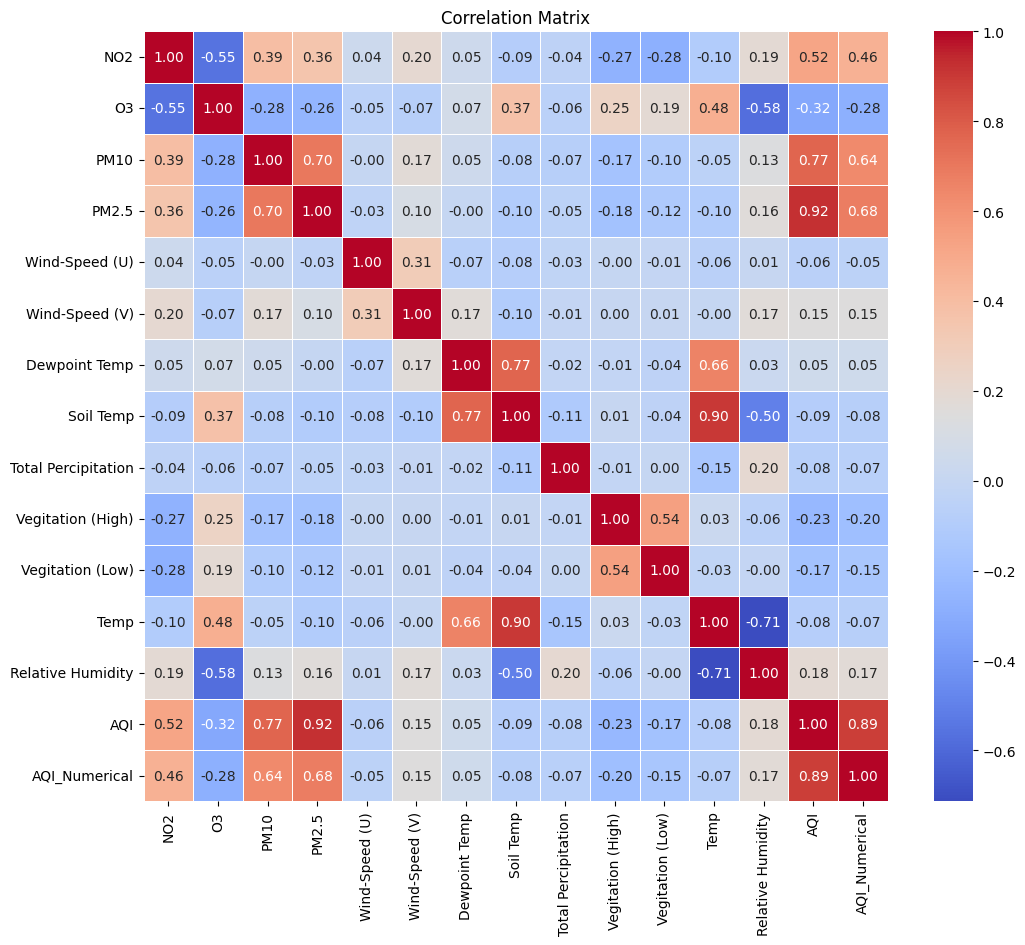

In [33]:
# Plot histograms for each numerical variable
numerical_columns = ['NO2', 'O3', 'PM10', 'PM2.5', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Dewpoint Temp', 'Soil Temp', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)', 'Temp', 'Relative Humidity','AQI', 'AQI_Numerical']


# Generate and plot the correlation matrix
correlation_matrix = df2[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [34]:
df2['PM10'].fillna(df2['PM10'].mean(), inplace=True)
df2['PM2.5'].fillna(df2['PM2.5'].mean(), inplace=True)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1726464 entries, 2020-05-01 00:00:00 to 2023-05-29 23:00:00
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   NO2                  float64
 1   O3                   float64
 2   PM10                 float64
 3   PM2.5                float64
 4   Latitude             float64
 5   Longitude            float64
 6   station_name         object 
 7   Wind-Speed (U)       float64
 8   Wind-Speed (V)       float64
 9   Dewpoint Temp        float64
 10  Soil Temp            float64
 11  Total Percipitation  float64
 12  Vegitation (High)    float64
 13  Vegitation (Low)     float64
 14  Temp                 float64
 15  Relative Humidity    float64
 16  AQI                  float64
 17  AQI_Category         object 
 18  AQI_Numerical        int64  
dtypes: float64(16), int64(1), object(2)
memory usage: 263.4+ MB


In [36]:
df2.isnull().sum()

,0
NO2,0
O3,0
PM10,0
PM2.5,0
Latitude,0
Longitude,0
station_name,0
Wind-Speed (U),0
Wind-Speed (V),0
Dewpoint Temp,0


In [37]:
df2.to_csv('/content/aqi_cleaned.csv')

##IMPORTING

In [38]:
import pandas as pd
data = pd.read_csv('/content/aqi_cleaned.csv')

In [39]:
data

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
0,2020-05-01 00:00:00,3.479941,76.284010,8.101824,6.200135,38.150000,23.550000,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896,Good,1
1,2020-05-01 00:00:00,17.563843,74.391100,10.520411,7.836725,37.850000,23.750000,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731,32.653020,Good,1
2,2020-05-01 00:00:00,2.892315,74.565690,8.587352,6.306404,38.150000,23.650000,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317,26.276682,Good,1
3,2020-05-01 00:00:00,17.196804,67.904120,10.917974,8.207660,37.850000,23.850000,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915,34.198583,Good,1
4,2020-05-01 00:00:00,15.817172,67.634710,11.353168,8.217451,37.850000,23.950000,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202,34.239379,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726459,2023-05-29 23:00:00,24.000000,62.000000,19.000000,20.736000,37.932000,23.713000,SMYRNI,0.240230,-1.216293,13.464139,20.926649,0.000809,1.557783,1.392521,16.946201,79.994187,69.161545,Moderate,2
1726460,2023-05-29 23:00:00,15.000000,58.000000,22.000000,12.737628,37.901000,23.879000,KOROPI,0.075186,-1.339309,13.110978,21.116500,0.000581,1.663799,2.290440,17.310772,76.371899,52.340934,Moderate,2
1726461,2023-05-29 23:00:00,21.000000,63.000000,20.490770,13.595480,37.948063,23.728360,PANACEA_045,0.187023,-1.266590,13.567210,21.332090,0.000747,1.456289,1.458575,17.227108,79.111524,54.145001,Moderate,2
1726462,2023-05-29 23:00:00,21.750000,61.000000,14.873333,13.720000,37.977210,23.783016,National Technical University of Athens,0.178085,-1.270455,13.483125,21.273565,0.000733,1.429464,1.538669,17.192159,78.857385,54.406867,Moderate,2


In [40]:
data.isnull().sum()

,0
Date,0
NO2,0
O3,0
PM10,0
PM2.5,0
Latitude,0
Longitude,0
station_name,0
Wind-Speed (U),0
Wind-Speed (V),0


In [41]:
data_sorted = data.sort_values(by='Date', ascending=True)
display(data_sorted)


,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
0,2020-05-01 00:00:00,3.479941,76.284010,8.101824,6.200135,38.15000,23.550000,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896,Good,1
34,2020-05-01 00:00:00,48.280560,43.551853,12.000000,13.000000,37.98204,23.794780,ATHENS_02,1.827617,-0.878582,10.030270,17.812905,0.000044,1.471124,0.785802,14.188421,76.102745,52.892704,Moderate,2
35,2020-05-01 00:00:00,71.000000,1.000000,229.000000,131.000000,37.99345,23.744556,PANACEA_001,1.894967,-0.940516,10.431960,18.064391,0.000042,1.236699,1.078760,13.838998,80.047092,189.983140,Very Unhealthy,4
36,2020-05-01 00:00:00,71.000000,49.682840,229.000000,131.000000,37.97312,23.718056,PANACEA_000,1.951961,-1.013971,10.751904,18.326339,0.000041,1.007595,0.998724,13.896932,81.434787,189.983140,Very Unhealthy,4
37,2020-05-01 00:00:00,33.939940,49.682840,13.458151,10.469307,37.97081,23.748861,PANACEA_039,1.912817,-0.943198,10.368909,18.018976,0.000041,1.394497,1.133403,13.940105,79.207020,43.622113,Good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726426,2023-05-29 23:00:00,23.592476,62.913223,17.866667,16.113333,37.97381,23.719069,CleanAir in Greece - Thiseio II,0.206695,-1.264044,13.834846,21.819895,0.000790,0.991183,0.993116,17.333390,79.936127,59.440057,Moderate,2
1726427,2023-05-29 23:00:00,24.308407,61.684834,18.143023,10.256213,37.85000,23.750000,Athens CAMS station 9,0.214275,-1.238656,13.404108,20.834574,0.000768,1.713203,1.426653,16.982458,79.511505,42.734221,Good,1
1726428,2023-05-29 23:00:00,29.450640,68.105500,17.861193,11.609172,37.85000,23.650000,Athens CAMS station 8,0.250205,-1.204437,13.413361,20.768693,0.000812,1.691557,1.499634,16.883444,80.055674,48.371550,Good,1
1726430,2023-05-29 23:00:00,20.510029,52.980500,18.360280,11.352183,37.95000,23.950000,Athens CAMS station 6,0.201650,-1.244336,13.349600,20.728498,0.000849,1.711001,1.765690,17.005146,79.107080,47.300763,Good,1


###BUILDING THE MODEL

####FITTING AND FORECASTING

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 11.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

RMSE: 22.648263861933113
MSE: 512.9438559597454
MAE: 15.719410248653567


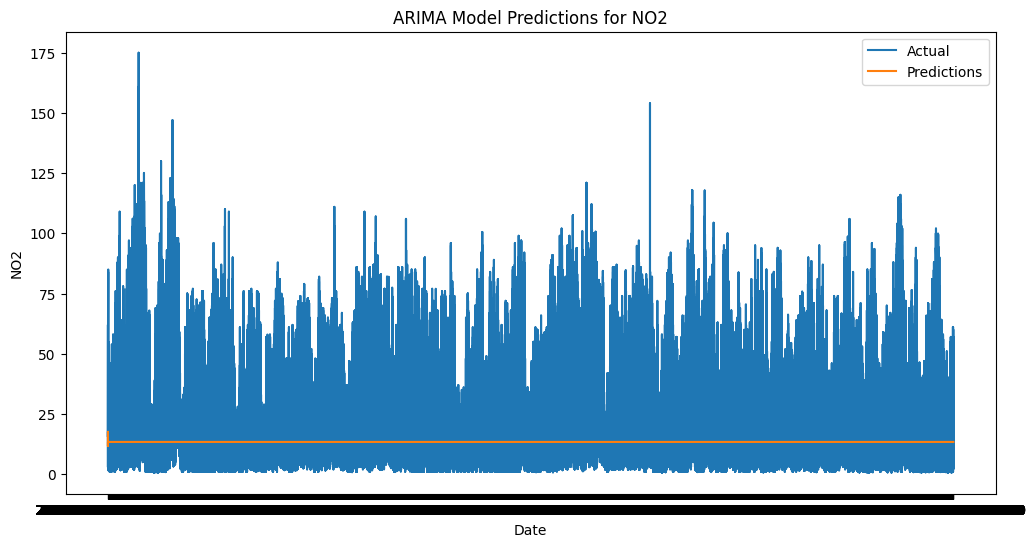

In [42]:
!pip install statsmodels
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Splitting dataset into training and testing sets (80:20) split
train_data, test_data = train_test_split(data_sorted, test_size=0.2, shuffle=False)

# Extracting NO2 column from the training set
train_no2 = train_data['NO2']

# Fitting the ARIMA model
model = ARIMA(train_no2, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train_no2), end=len(data_sorted)-1)

# Evaluating the model
org_NO2_rmse = mean_squared_error(test_data['NO2'], predictions, squared=False)
org_NO2_mse = mean_squared_error(test_data['NO2'], predictions)
org_NO2_mae= mean_absolute_error(test_data['NO2'], predictions)

print('RMSE:', org_NO2_rmse)
print('MSE:', org_NO2_mse)
print('MAE:', org_NO2_mae)

# Plotting the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['NO2'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('ARIMA Model Predictions for NO2')
plt.xlabel('Date')
plt.ylabel('NO2')
plt.legend()
plt.show()


In [43]:
print("Predicted values:\n", predictions[:5])
print("Actual values:", test_data['NO2'].values[:5])

Predicted values:
 1381171    17.552967
1381172    11.749918
1381173    12.531178
1381174    12.594915
1381175    13.423288
Name: predicted_mean, dtype: float64
Actual values: [17.157917 17.157917 10.517227 62.        2.971114]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

RMSE: 27.67249273389522


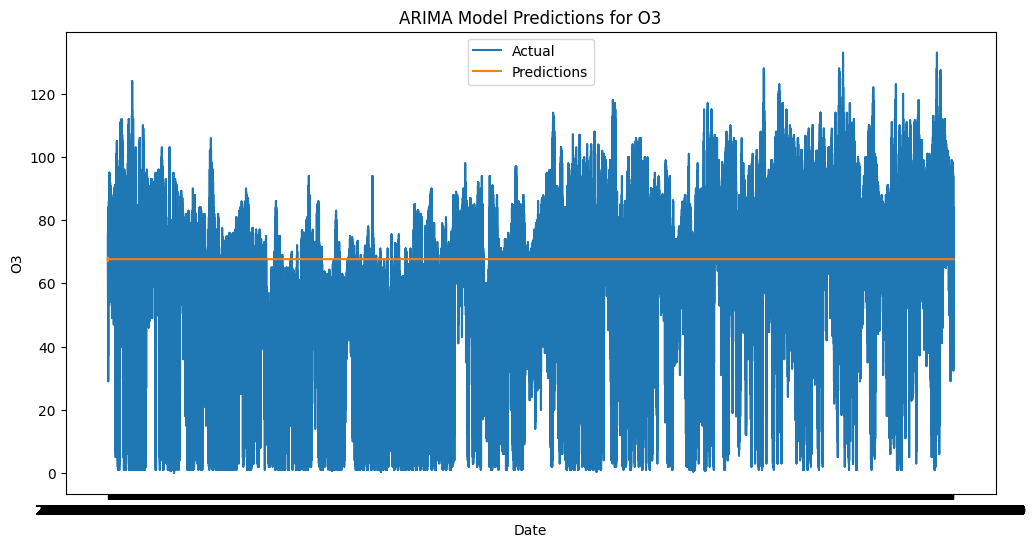

In [44]:
# Extracting the O3 column from the training set
train_o3 = train_data['O3']

# Fitting the ARIMA model

model = ARIMA(train_o3, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train_o3), end=len(data_sorted)-1)

# Evaluating the model
rmse = mean_squared_error(test_data['O3'], predictions, squared=False)
print('RMSE:', rmse)

# Plotting the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['O3'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('ARIMA Model Predictions for O3')
plt.xlabel('Date')
plt.ylabel('O3')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

RMSE: 22.327185607620976


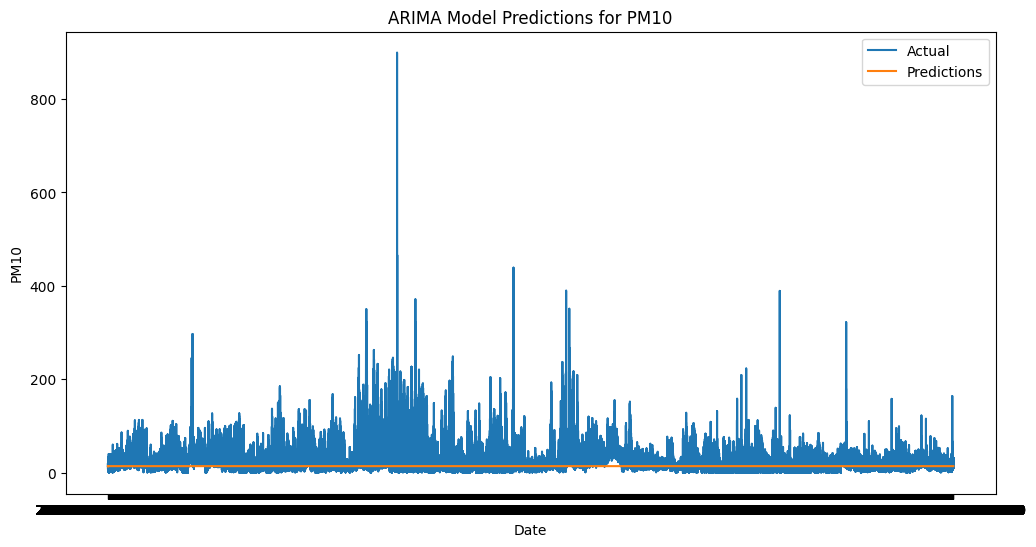

In [45]:
# Extracting the PM10 column from the training set
train_pm10 = train_data['PM10']

# Fitting the ARIMA model

model = ARIMA(train_pm10, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train_pm10), end=len(data_sorted)-1)

# Evaluating the model
rmse = mean_squared_error(test_data['PM10'], predictions, squared=False)
print('RMSE:', rmse)

# Plotting the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['PM10'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('ARIMA Model Predictions for PM10')
plt.xlabel('Date')
plt.ylabel('PM10')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

RMSE: 22.373445842245673


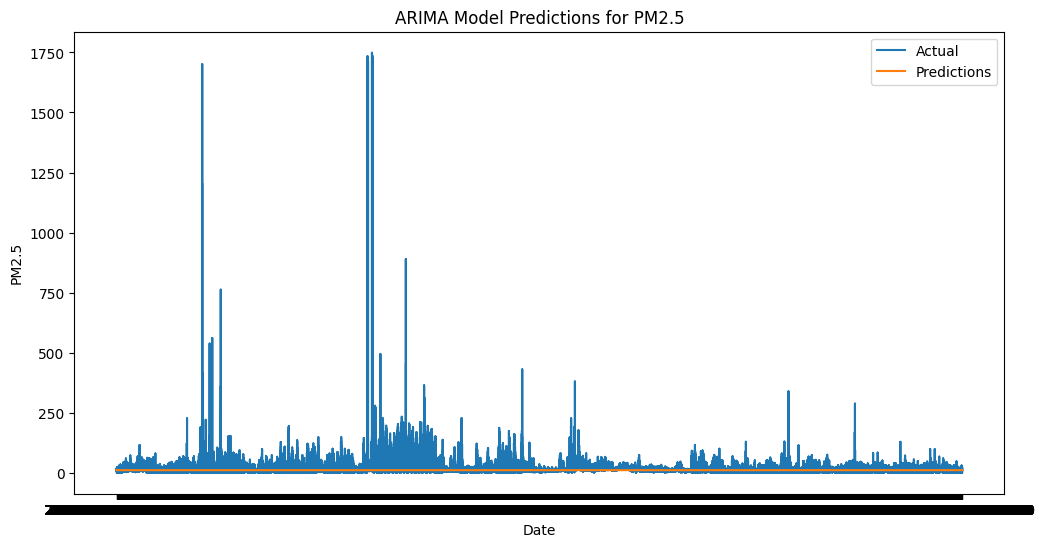

In [46]:
# Extracting the PM2.5 column from the training set
train_pm25 = train_data['PM2.5']

# Fitting the ARIMA model
model = ARIMA(train_pm25, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions on the testing set
predictions = model_fit.predict(start=len(train_pm25), end=len(data_sorted)-1)

# Evaluating the model
rmse = mean_squared_error(test_data['PM2.5'], predictions, squared=False)
print('RMSE:', rmse)

# Plotting the predictions against the actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data['Date'], test_data['PM2.5'], label='Actual')
plt.plot(test_data['Date'], predictions, label='Predictions')
plt.title('ARIMA Model Predictions for PM2.5')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()


In [47]:
print("Predicted values:", predictions[:5])
print("Actual values:", test_data['PM2.5'].values[:5])


Predicted values: 1381171    10.794150
1381172    10.649689
1381173    10.576220
1381174    10.495148
1381175    10.587472
Name: predicted_mean, dtype: float64
Actual values: [ 8.97142857 12.90555556 11.355148   16.          8.2075    ]


###FORECASTING

In [48]:
import pandas as pd
data1 = pd.read_csv("/content/aqi_cleaned.csv")


In [49]:
# Converting the 'Date' column to datetime and setting it as index
data1['Date'] = pd.to_datetime(data1['Date']) # Convert 'Date' column to datetime
data1.set_index('Date', inplace=True) #Setting Date columnn as index

# Resample data to daily average (if data is in hourly format)
no2_data = data1['NO2'].resample('D').mean()

# Fiting the ARIMA model to NO2 pollutant
arima_model = ARIMA(no2_data, order=(5,1,0))
arima_result = arima_model.fit()

# Forecasting future values for next 60 days
forecast_steps = 60
forecast = arima_result.forecast(steps=forecast_steps)

forecast.head()

,predicted_mean
2023-05-30,20.543650
2023-05-31,21.588079
2023-06-01,19.994893
2023-06-02,17.936057
2023-06-03,16.907595


In [50]:
o3_data = data1['O3'].resample('D').mean()


arima_model_o3 = ARIMA(o3_data, order=(5,1,0))
arima_result_o3 = arima_model_o3.fit()


forecast_o3_steps = 60  # Forecasting for the next 60 days
forecast_o3 = arima_result_o3.forecast(steps=forecast_o3_steps)

forecast_o3.head(30)

,predicted_mean
2023-05-30,75.320482
2023-05-31,75.985045
2023-06-01,77.195551
2023-06-02,78.984081
2023-06-03,79.046628
2023-06-04,78.196395
2023-06-05,77.731966
2023-06-06,77.623910
2023-06-07,77.720355
2023-06-08,77.965096


In [51]:
pm25_data = data1['PM2.5'].resample('D').mean()

# Fitting the ARIMA model for PM2.5 pollutant
arima_model_pm25 = ARIMA(pm25_data, order=(5,1,0))
arima_result_pm25 = arima_model_pm25.fit()

forecast_pm25_steps = 60  # Forecasting for the next 60 days
forecast_pm25 = arima_result_pm25.forecast(steps=forecast_pm25_steps)

forecast_pm25.head()

,predicted_mean
2023-05-30,11.368935
2023-05-31,12.017004
2023-06-01,11.765742
2023-06-02,11.394826
2023-06-03,11.037790


In [52]:
pm10_data = data1['PM10'].resample('D').mean()

# Fitting the ARIMA model for PM10 pollutant
arima_model_pm10 = ARIMA(pm10_data, order=(5,1,0))
arima_result_pm10 = arima_model_pm10.fit()

# Forecastiung future values for PM10 pollutant for the next 60 days
forecast_pm10_steps = 60
forecast_pm10 = arima_result_pm10.forecast(steps=forecast_pm10_steps)

forecast_pm10.head()

,predicted_mean
2023-05-30,15.745859
2023-05-31,16.258665
2023-06-01,15.959058
2023-06-02,15.456427
2023-06-03,15.079699


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


no2_predictions = arima_result.predict(start=no2_data.index[0], end=no2_data.index[-1])

# Calculating MAE, MSE, and RMSE for NO2 pollutant
mae_no2 = mean_absolute_error(no2_data, no2_predictions)
mse_no2 = mean_squared_error(no2_data, no2_predictions)
rmse_no2 = np.sqrt(mse_no2)

(mae_no2, mse_no2, rmse_no2)


(5.2833876644693945, 45.812231852808374, 6.768473376826445)

In [54]:
# Generating in-sample predictions for O3 pollutant
o3_predictions = arima_result_o3.predict(start=o3_data.index[0], end=o3_data.index[-1])

# Calculating MAE, MSE, and RMSE for O3 pollutant
mae_o3 = mean_absolute_error(o3_data, o3_predictions)
mse_o3 = mean_squared_error(o3_data, o3_predictions)
rmse_o3 = np.sqrt(mse_o3)

pm25_predictions = arima_result_pm25.predict(start=pm25_data.index[0], end=pm25_data.index[-1])

mae_pm25 = mean_absolute_error(pm25_data, pm25_predictions)
mse_pm25 = mean_squared_error(pm25_data, pm25_predictions)
rmse_pm25 = np.sqrt(mse_pm25)

pm10_predictions = arima_result_pm10.predict(start=pm10_data.index[0], end=pm10_data.index[-1])

mae_pm10 = mean_absolute_error(pm10_data, pm10_predictions)
mse_pm10 = mean_squared_error(pm10_data, pm10_predictions)
rmse_pm10 = np.sqrt(mse_pm10)

(mae_o3, mse_o3, rmse_o3), (mae_pm25, mse_pm25, rmse_pm25), (mae_pm10, mse_pm10, rmse_pm10)


((6.644324390252227, 76.46006242803008, 8.744144465185263),
 (3.6299000462786104, 25.312791046188543, 5.0311818736941465),
 (5.360021161848485, 55.197453913188156, 7.429498900544246))

###OPTIMISING THE MODEL

In [55]:
import itertools
import warnings
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

def optimize_arima(data, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    best_model = None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(data, order=(p, d, q)).fit()
            if model.aic < best_aic:
                best_aic = model.aic
                best_order = (p, d, q)
                best_model = model
        except:
            continue
    return best_order, best_model

# Define the range of parameters
p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)




In [56]:
# Optimizzing ARIMA parameters for NO2 pollutant
best_order_no2, best_model_no2 = optimize_arima(no2_data, p_values, d_values, q_values)

best_order_no2, best_model_no2.aic

# Fitting the ARIMA model with the optimal parameters for NO2 pollutant
optimized_arima_model_no2 = ARIMA(no2_data, order=best_order_no2).fit()

# Generating in-sample predictions for NO2 using the optimized model
optimized_no2_predictions = optimized_arima_model_no2.predict(start=no2_data.index[0], end=no2_data.index[-1])

# Calculatiung MAE, MSE, and RMSE for the optimized NO2 model
optimized_mae_no2 = mean_absolute_error(no2_data, optimized_no2_predictions)
optimized_mse_no2 = mean_squared_error(no2_data, optimized_no2_predictions)
optimized_rmse_no2 = np.sqrt(optimized_mse_no2)

optimized_mae_no2, optimized_mse_no2, optimized_rmse_no2


(5.084096685929862, 41.24789275169272, 6.422452238179177)

In [57]:
best_order_o3, best_model_o3 = optimize_arima(o3_data, p_values, d_values, q_values)

optimized_arima_model_o3 = ARIMA(o3_data, order=best_order_o3).fit()


optimized_o3_predictions = optimized_arima_model_o3.predict(start=o3_data.index[0], end=o3_data.index[-1])


optimized_mae_o3 = mean_absolute_error(o3_data, optimized_o3_predictions)
optimized_mse_o3 = mean_squared_error(o3_data, optimized_o3_predictions)
optimized_rmse_o3 = np.sqrt(optimized_mse_o3)

best_order_o3, optimized_mae_o3, optimized_mse_o3, optimized_rmse_o3


((4, 1, 4), 6.440112634094391, 72.09499664974318, 8.49087726031552)

In [58]:
# Optimizing ARIMA parameters for PM2.5
best_order_pm25, best_model_pm25 = optimize_arima(pm25_data, p_values, d_values, q_values)

# Fitting the ARIMA model with the optimal parameters for PM2.5
optimized_arima_model_pm25 = ARIMA(pm25_data, order=best_order_pm25).fit()

# Generating in-sample predictions for PM2.5 using the optimized model
optimized_pm25_predictions = optimized_arima_model_pm25.predict(start=pm25_data.index[0], end=pm25_data.index[-1])

# Calculating MAE, MSE, and RMSE for the optimized PM2.5 model
optimized_mae_pm25 = mean_absolute_error(pm25_data, optimized_pm25_predictions)
optimized_mse_pm25 = mean_squared_error(pm25_data, optimized_pm25_predictions)
optimized_rmse_pm25 = np.sqrt(optimized_mse_pm25)

best_order_pm25, optimized_mae_pm25, optimized_mse_pm25, optimized_rmse_pm25


((5, 1, 5), 3.529164501598544, 23.519196323456317, 4.849659402829885)

In [59]:
best_order_pm10, best_model_pm10 = optimize_arima(pm10_data, p_values, d_values, q_values)

optimized_arima_model_pm10 = ARIMA(pm10_data, order=best_order_pm10).fit()


optimized_pm10_predictions = optimized_arima_model_pm10.predict(start=pm10_data.index[0], end=pm10_data.index[-1])


optimized_mae_pm10 = mean_absolute_error(pm10_data, optimized_pm10_predictions)
optimized_mse_pm10 = mean_squared_error(pm10_data, optimized_pm10_predictions)
optimized_rmse_pm10 = np.sqrt(optimized_mse_pm10)

best_order_pm10, optimized_mae_pm10, optimized_mse_pm10, optimized_rmse_pm10


((4, 0, 3), 5.17173243457682, 50.022527494369605, 7.072660566884968)

###DISPLAYING THE COMPARISION BETWEEN ORIGINAL AND OPTIMIZED MODEL'S ERRORS

###FORCASTED DATA

In [60]:
# Forecasting future values for NO2 using the optimized model
forecast_no2_optimized = best_model_no2.forecast(steps=60)


forecast_o3_optimized = best_model_o3.forecast(steps=60)


forecast_pm25_optimized = best_model_pm25.forecast(steps=60)


forecast_pm10_optimized = best_model_pm10.forecast(steps=60)

forecast_no2_optimized.head(), forecast_o3_optimized.head(), forecast_pm25_optimized.head(), forecast_pm10_optimized.head()


(2023-05-30    20.663499
 2023-05-31    22.613832
 2023-06-01    22.945190
 2023-06-02    22.750880
 2023-06-03    22.546113
 Freq: D, Name: predicted_mean, dtype: float64,
 2023-05-30    76.211427
 2023-05-31    74.658796
 2023-06-01    75.726878
 2023-06-02    76.120226
 2023-06-03    74.805908
 Freq: D, Name: predicted_mean, dtype: float64,
 2023-05-30    11.971533
 2023-05-31    12.833981
 2023-06-01    12.946822
 2023-06-02    12.880966
 2023-06-03    13.248291
 Freq: D, Name: predicted_mean, dtype: float64,
 2023-05-30    16.941827
 2023-05-31    18.888114
 2023-06-01    18.672348
 2023-06-02    18.998095
 2023-06-03    19.053079
 Freq: D, Name: predicted_mean, dtype: float64)

###EVALUATION METRICS

In [61]:
# Evaluating the optimized ARIMA models using various metrics

# NO2
print("NO2 Model Evaluation:")
print("AIC:", best_model_no2.aic)
print("BIC:", best_model_no2.bic)
print("MAE:", optimized_mae_no2)
print("MSE:", optimized_mse_no2)
print("RMSE:", optimized_rmse_no2)
print("\n")

# O3
print("O3 Model Evaluation:")
print("AIC:", best_model_o3.aic)
print("BIC:", best_model_o3.bic)
print("MAE:", optimized_mae_o3)
print("MSE:", optimized_mse_o3)
print("RMSE:", optimized_rmse_o3)
print("\n")

# PM2.5
print("PM2.5 Model Evaluation:")
print("AIC:", best_model_pm25.aic)
print("BIC:", best_model_pm25.bic)
print("MAE:", optimized_mae_pm25)
print("MSE:", optimized_mse_pm25)
print("RMSE:", optimized_rmse_pm25)
print("\n")

# PM10
print("PM10 Model Evaluation:")
print("AIC:", best_model_pm10.aic)
print("BIC:", best_model_pm10.bic)
print("MAE:", optimized_mae_pm10)
print("MSE:", optimized_mse_pm10)
print("RMSE:", optimized_rmse_pm10)


NO2 Model Evaluation:
AIC: 7364.165630490605
BIC: 7384.2606663095585
MAE: 5.084096685929862
MSE: 41.24789275169272
RMSE: 6.422452238179177


O3 Model Evaluation:
AIC: 7948.625035402361
BIC: 7993.838865995007
MAE: 6.440112634094391
MSE: 72.09499664974318
RMSE: 8.49087726031552


PM2.5 Model Evaluation:
AIC: 6748.678947210754
BIC: 6803.940295712877
MAE: 3.529164501598544
MSE: 23.519196323456317
RMSE: 4.849659402829885


PM10 Model Evaluation:
AIC: 7605.680344988508
BIC: 7650.902186262591
MAE: 5.17173243457682
MSE: 50.022527494369605
RMSE: 7.072660566884968


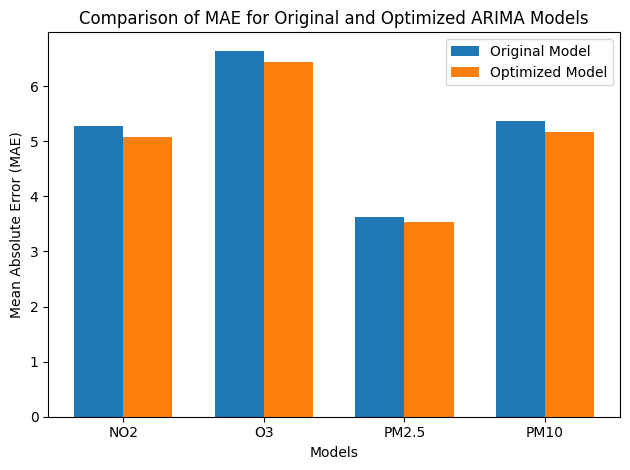

In [62]:
#Comparision between original And Optimal values for MAE scores

import matplotlib.pyplot as plt

models = ['NO2', 'O3', 'PM2.5', 'PM10']
original_mae = [mae_no2, mae_o3, mae_pm25, mae_pm10]
optimized_mae = [optimized_mae_no2, optimized_mae_o3, optimized_mae_pm25, optimized_mae_pm10]

bar_width = 0.35


fig, ax = plt.subplots()
original_bars = ax.bar(np.arange(len(models)), original_mae, bar_width, label='Original Model')
optimized_bars = ax.bar(np.arange(len(models)) + bar_width, optimized_mae, bar_width, label='Optimized Model')

# Next I am Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_title('Comparison of MAE for Original and Optimized ARIMA Models')
ax.set_xticks(np.arange(len(models)) + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Displaying the chart
plt.tight_layout()
plt.show()


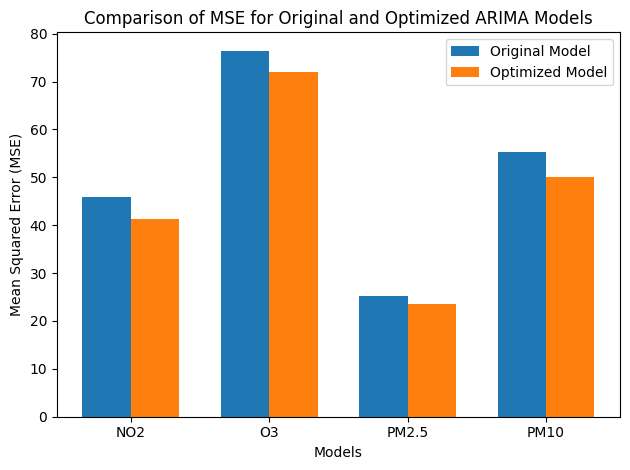

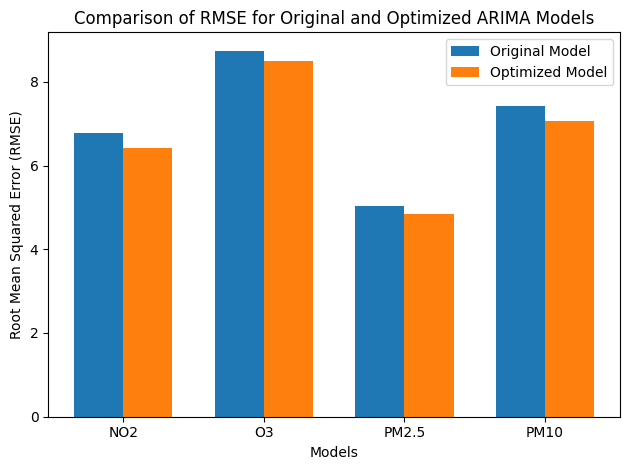

In [63]:
#Similarly I am doing this for MSE and RMSE

models = ['NO2', 'O3', 'PM2.5', 'PM10']
original_mse = [mse_no2, mse_o3, mse_pm25, mse_pm10]
optimized_mse = [optimized_mse_no2, optimized_mse_o3, optimized_mse_pm25, optimized_mse_pm10]


bar_width = 0.35


fig, ax = plt.subplots()
original_bars = ax.bar(np.arange(len(models)), original_mse, bar_width, label='Original Model')
optimized_bars = ax.bar(np.arange(len(models)) + bar_width, optimized_mse, bar_width, label='Optimized Model')


ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error (MSE)')
ax.set_title('Comparison of MSE for Original and Optimized ARIMA Models')
ax.set_xticks(np.arange(len(models)) + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()


plt.tight_layout()
plt.show()


original_rmse = [rmse_no2, rmse_o3, rmse_pm25, rmse_pm10]
optimized_rmse = [optimized_rmse_no2, optimized_rmse_o3, optimized_rmse_pm25, optimized_rmse_pm10]


fig, ax = plt.subplots()
original_bars = ax.bar(np.arange(len(models)), original_rmse, bar_width, label='Original Model')
optimized_bars = ax.bar(np.arange(len(models)) + bar_width, optimized_rmse, bar_width, label='Optimized Model')


ax.set_xlabel('Models')
ax.set_ylabel('Root Mean Squared Error (RMSE)')
ax.set_title('Comparison of RMSE for Original and Optimized ARIMA Models')
ax.set_xticks(np.arange(len(models)) + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()


plt.tight_layout()
plt.show()


###DISPLAYING FORCASTED DATA

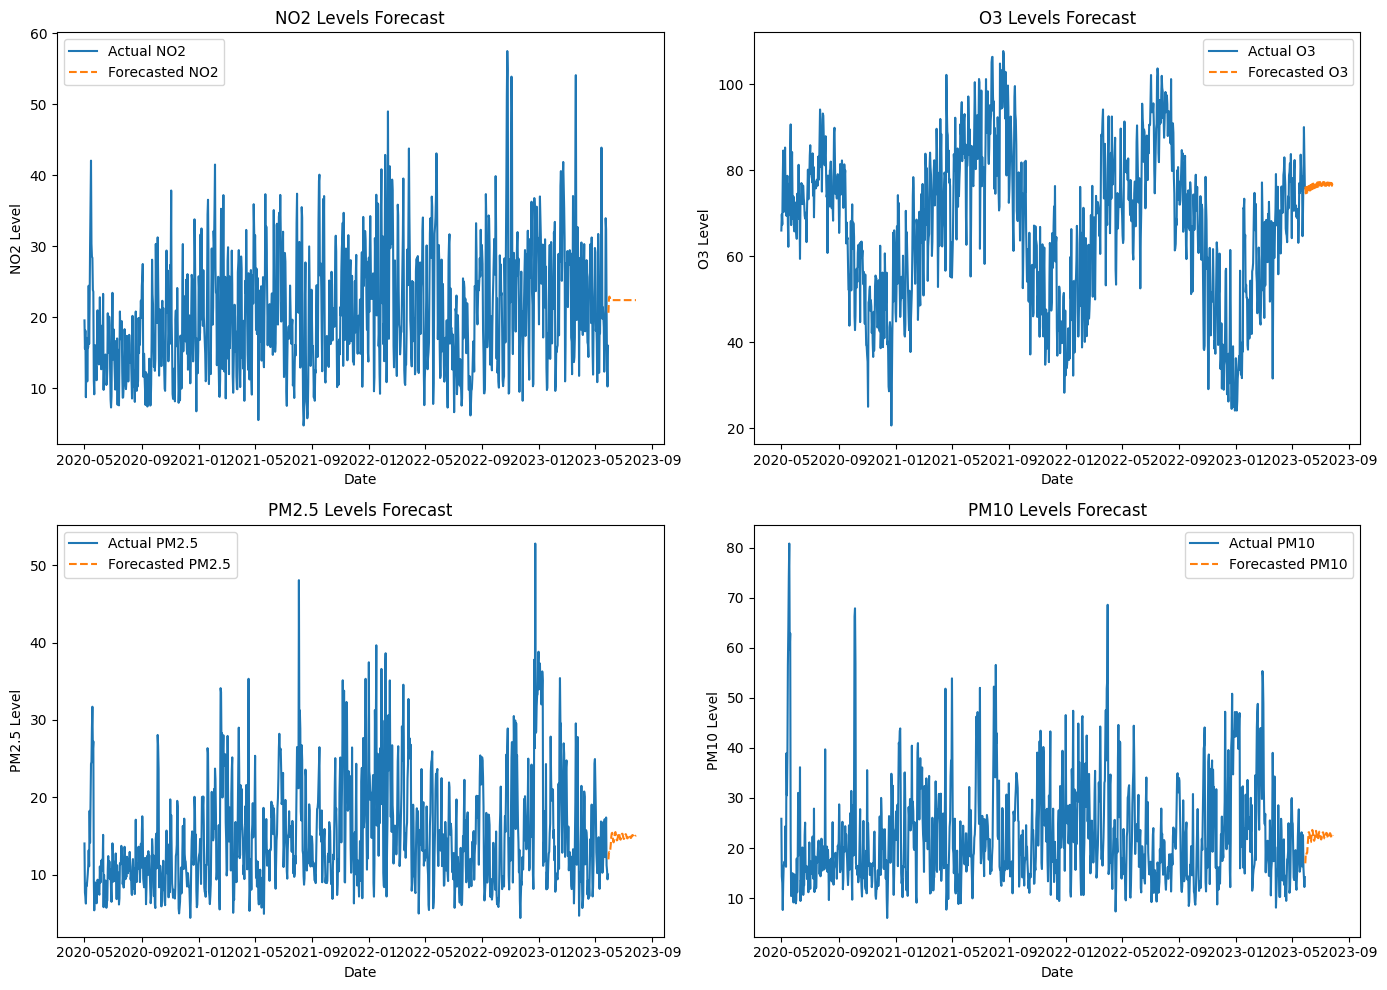

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# NO2
plt.subplot(2, 2, 1)
plt.plot(no2_data, label='Actual NO2')
plt.plot(forecast_no2_optimized.index, forecast_no2_optimized, label='Forecasted NO2', linestyle='--')
plt.title('NO2 Levels Forecast')
plt.xlabel('Date')
plt.ylabel('NO2 Level')
plt.legend()

# O3
plt.subplot(2, 2, 2)
plt.plot(o3_data, label='Actual O3')
plt.plot(forecast_o3_optimized.index, forecast_o3_optimized, label='Forecasted O3', linestyle='--')
plt.title('O3 Levels Forecast')
plt.xlabel('Date')
plt.ylabel('O3 Level')
plt.legend()

# PM2.5
plt.subplot(2, 2, 3)
plt.plot(pm25_data, label='Actual PM2.5')
plt.plot(forecast_pm25_optimized.index, forecast_pm25_optimized, label='Forecasted PM2.5', linestyle='--')
plt.title('PM2.5 Levels Forecast')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()

# PM10
plt.subplot(2, 2, 4)
plt.plot(pm10_data, label='Actual PM10')
plt.plot(forecast_pm10_optimized.index, forecast_pm10_optimized, label='Forecasted PM10', linestyle='--')
plt.title('PM10 Levels Forecast')
plt.xlabel('Date')
plt.ylabel('PM10 Level')
plt.legend()

plt.tight_layout()
plt.show()


In [65]:
import pandas as pd
# NO2
forecast_no2_df = pd.DataFrame({
    'Date': forecast_no2_optimized.index,
    'Predicted NO2': forecast_no2_optimized.values
})
forecast_no2_df.to_csv('forecast_no2.csv', index=False)

# O3
forecast_o3_df = pd.DataFrame({
    'Date': forecast_o3_optimized.index,
    'Predicted O3': forecast_o3_optimized.values
})
forecast_o3_df.to_csv('forecast_o3.csv', index=False)

# PM2.5
forecast_pm25_df = pd.DataFrame({
    'Date': forecast_pm25_optimized.index,
    'Predicted PM2.5': forecast_pm25_optimized.values
})
forecast_pm25_df.to_csv('forecast_pm25.csv', index=False)

# PM10
forecast_pm10_df = pd.DataFrame({
    'Date': forecast_pm10_optimized.index,
    'Predicted PM10': forecast_pm10_optimized.values
})
forecast_pm10_df.to_csv('forecast_pm10.csv', index=False)


In [66]:
import pandas as pd
# Read the individual forecast files
forecast_no2 = pd.read_csv('forecast_no2.csv')
forecast_o3 = pd.read_csv('forecast_o3.csv')
forecast_pm25 = pd.read_csv('forecast_pm25.csv')
forecast_pm10 = pd.read_csv('forecast_pm10.csv')

# Merge the dataframes based on 'Date'
merged_forecast = forecast_no2.merge(forecast_o3, on='Date', how='outer') \
                               .merge(forecast_pm25, on='Date', how='outer') \
                               .merge(forecast_pm10, on='Date', how='outer')

# Save the merged forecast to a single CSV file
merged_forecast.to_csv('merged_forecast.csv', index=False)


##INTERPRETATION

The NO2 model has relatively low AIC and BIC values, suggesting a **Good** **fit** with a balance between accuracy and complexity. The MAE and RMSE values are moderate, indicating **Decent** predictive accuracy.

The O3 model has the highest AIC and BIC values, indicating it might be the **least well-fitted model** among the four. The higher MAE, MSE, and RMSE values suggest this model has larger errors and is **Less accurate** in its predictions compared to the other models.

The PM2.5 model has the **Lowest** AIC and BIC values, indicating it is likely the **Best-fitting model** among the four. The **Lowest** MAE, MSE, and RMSE values also suggest it has the highest predictive accuracy.

The PM10 model has **Higher** AIC and BIC values compared to the NO2 and PM2.5 models but lower than the O3 model. The MAE, MSE, and RMSE values are moderate, suggesting it **performs better than the O3 model** but not as well as the PM2.5 and NO2 models.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 3.1 MB/s eta 0:00:00

Training and evaluating model for NO2...
RMSE for NO2: 14.651662875223117
MSE for NO2: 214.67122500919132
MAE for NO2: 10.087034359558471


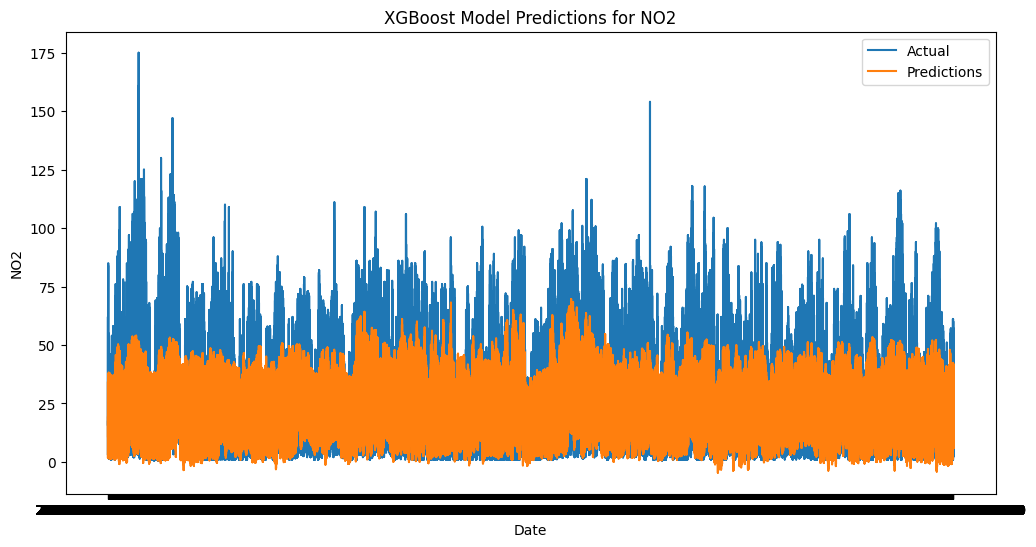


Training and evaluating model for O3...
RMSE for O3: 18.36482352498285
MSE for O3: 337.2667431037635
MAE for O3: 14.2779143749123


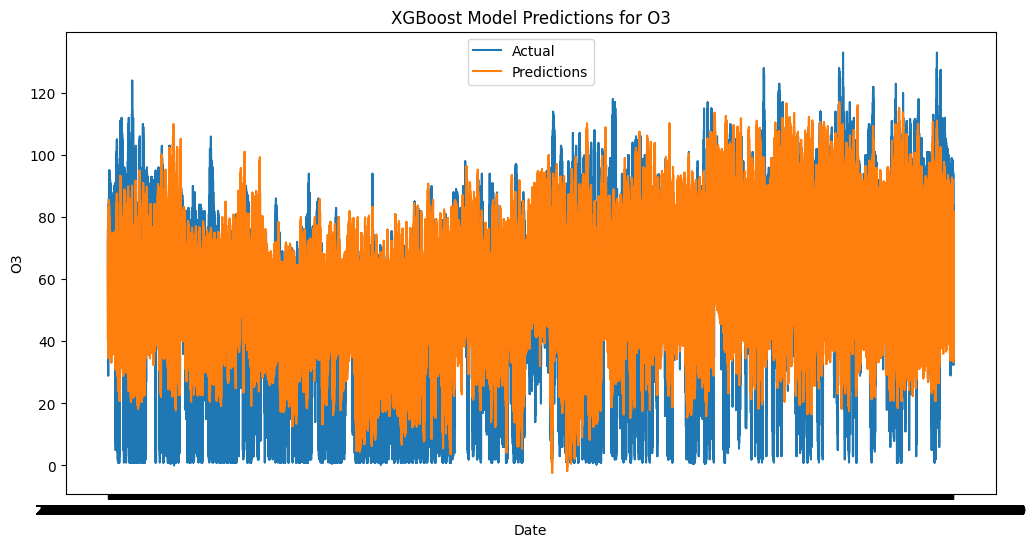


Training and evaluating model for PM10...
RMSE for PM10: 17.084615091821636
MSE for PM10: 291.88407283569956
MAE for PM10: 10.633022089470161


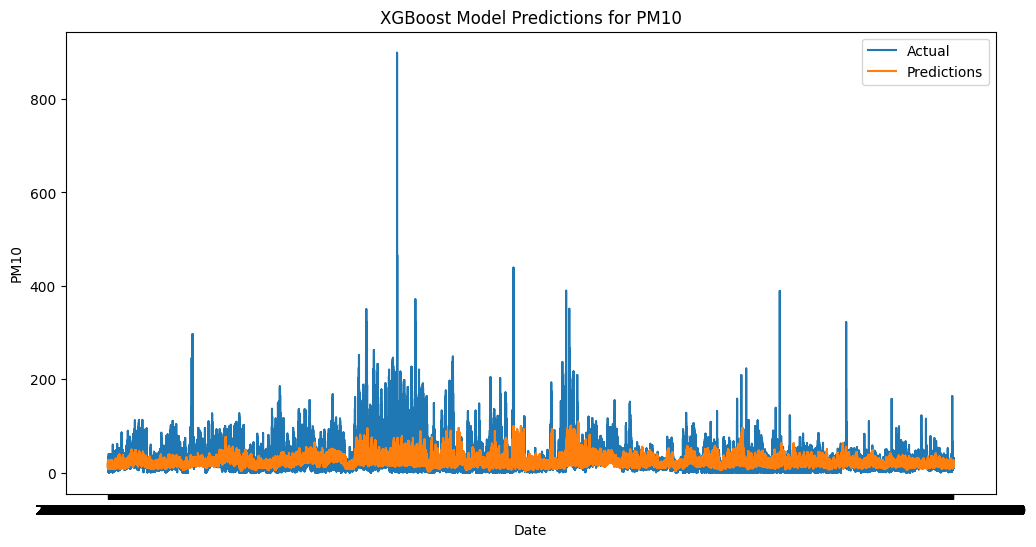


Training and evaluating model for PM2.5...
RMSE for PM2.5: 19.91774859946708
MSE for PM2.5: 396.7167092715729
MAE for PM2.5: 7.901103903109113


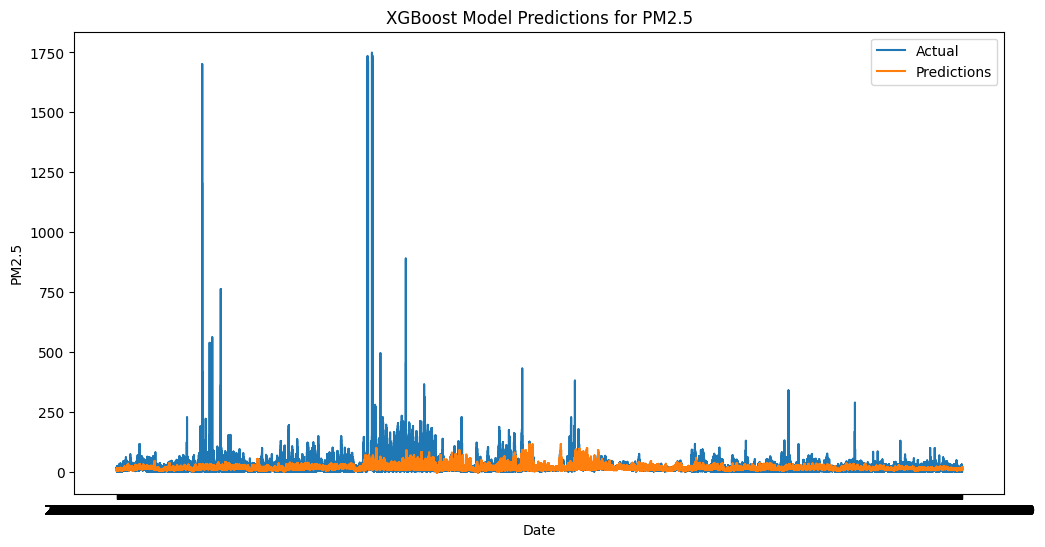

In [67]:
# Ensuring xgboost is installed
!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

# Load the dataset
data = pd.read_csv("/content/aqi_cleaned.csv")
# Sort the dataset by Date
data_sorted = data.sort_values(by='Date', ascending=True)

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data_sorted, test_size=0.2, shuffle=False)

# Extract features and target columns
features = ['Temp', 'Dewpoint Temp', 'Soil Temp', 'Relative Humidity', 'Wind-Speed (U)', 'Wind-Speed (V)', 'Total Percipitation', 'Vegitation (High)', 'Vegitation (Low)']
target_columns = ['NO2', 'O3', 'PM10', 'PM2.5']

# Train and evaluate the XGBoost model for each target column
for target in target_columns:
    print(f"\nTraining and evaluating model for {target}...")

    # Prepare the training and testing data
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    # Initialize and train the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    predictions = model.predict(X_test)

    # Evaluate the model
    rmse = mean_squared_error(y_test, predictions, squared=False)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)

    print(f'RMSE for {target}: {rmse}')
    print(f'MSE for {target}: {mse}')
    print(f'MAE for {target}: {mae}')

    # Plot the predictions against the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data['Date'], y_test, label='Actual')
    plt.plot(test_data['Date'], predictions, label='Predictions')
    plt.title(f'XGBoost Model Predictions for {target}')
    plt.xlabel('Date')
    plt.ylabel(target)
    plt.legend()
    plt.show()

In [68]:
data.head()

,Date,NO2,O3,PM10,PM2.5,Latitude,Longitude,station_name,Wind-Speed (U),Wind-Speed (V),Dewpoint Temp,Soil Temp,Total Percipitation,Vegitation (High),Vegitation (Low),Temp,Relative Humidity,AQI,AQI_Category,AQI_Numerical
0,2020-05-01 00:00:00,3.479941,76.28401,8.101824,6.200135,38.15,23.55,Athens CAMS station 0,1.713115,-0.588855,10.046454,17.083554,0.000035,1.699026,2.244626,12.948856,82.578812,25.833896,Good,1
1,2020-05-01 00:00:00,17.563843,74.39110,10.520411,7.836725,37.85,23.75,Athens CAMS station 9,1.960498,-0.937417,10.270286,17.909675,0.000037,1.743299,1.431182,14.011539,78.352731,32.653020,Good,1
2,2020-05-01 00:00:00,2.892315,74.56569,8.587352,6.306404,38.15,23.65,Athens CAMS station 1,1.640985,-0.556073,9.700422,16.976489,0.000040,1.642665,2.172998,12.550690,82.840317,26.276682,Good,1
3,2020-05-01 00:00:00,17.196804,67.90412,10.917974,8.207660,37.85,23.85,Athens CAMS station 10,2.003834,-0.971722,10.159251,17.993456,0.000036,1.753648,1.582832,14.261641,76.558915,34.198583,Good,1
4,2020-05-01 00:00:00,15.817172,67.63471,11.353168,8.217451,37.85,23.95,Athens CAMS station 11,1.954063,-0.912335,9.993532,17.957935,0.000036,1.706804,1.806660,14.179075,76.140202,34.239379,Good,1


Epoch 1/2
43160/43160 [==============================] - 1746s 40ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 2/2
10789/10789 [==============================] - 154s 14ms/step
Train Score: 221.50 RMSE
Test Score: 246.06 RMSE


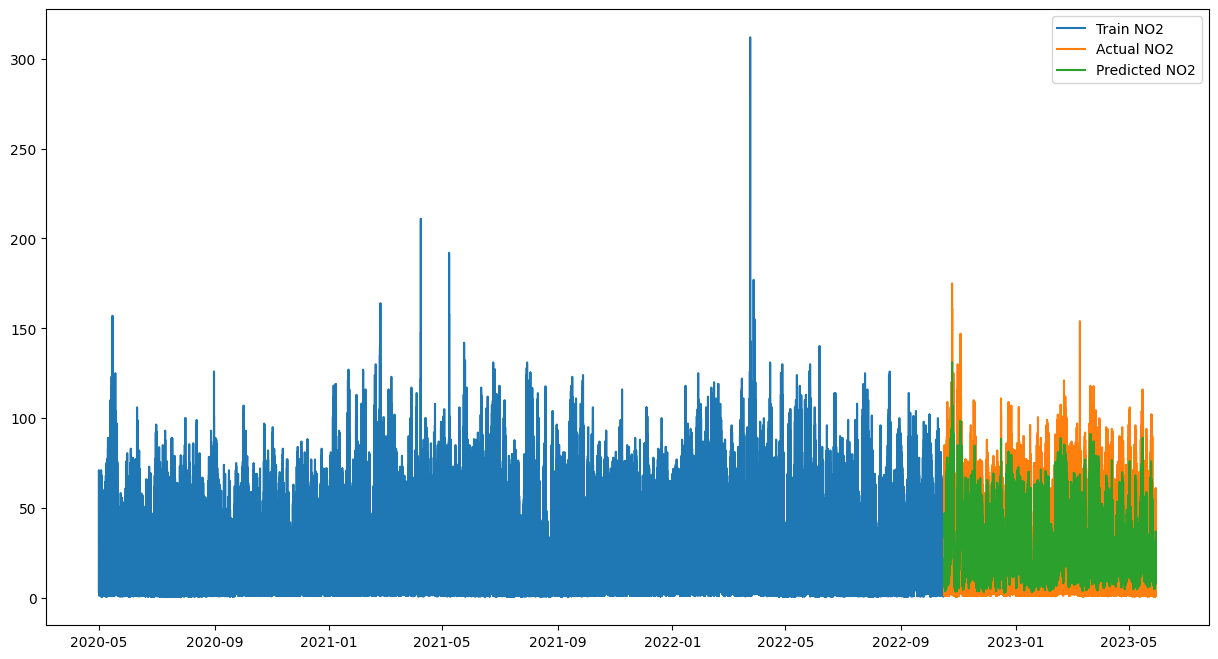

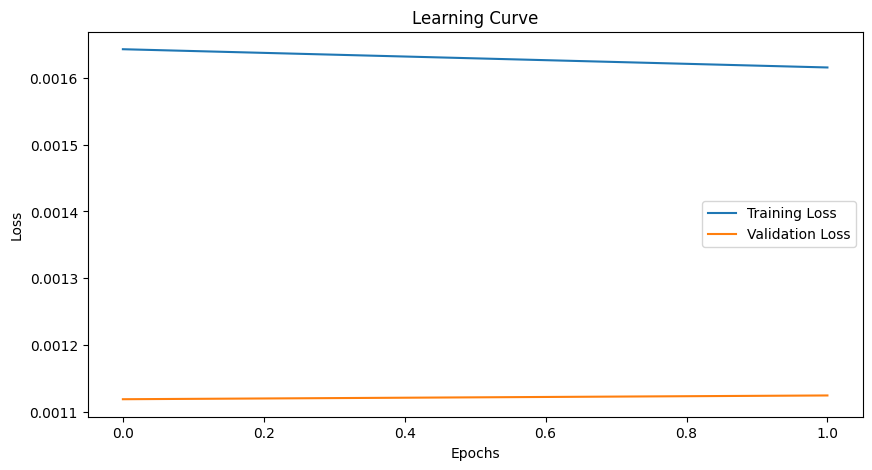

1/1 [==============================] - 0s 27ms/step


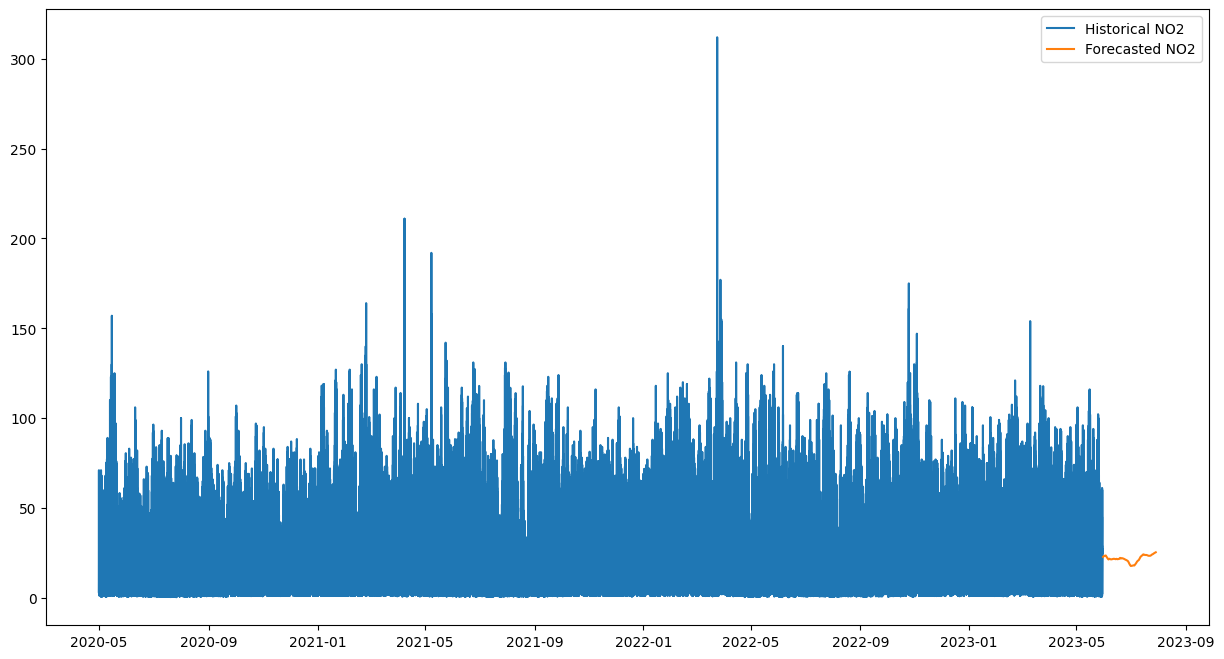

In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

# Load the data
file_path = '/content/aqi_cleaned.csv'
data = pd.read_csv(file_path)

# Parse dates
data['Date'] = pd.to_datetime(data['Date'])

# Set date as index
data.set_index('Date', inplace=True)

# Select relevant columns
cols = ['NO2', 'O3', 'PM2.5', 'PM10']
data = data[cols]

# Handle missing values
data = data.fillna(method='ffill')

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Convert the data to a supervised learning problem
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), :])
        y.append(data[i + time_step, :])
    return np.array(X), np.array(y)

# Define time step
time_step = 60

# Split data into training and test sets
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train_data, test_data = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

# Create datasets for LSTM
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Define LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, len(cols))))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(len(cols)))
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test)

# Evaluate the model
train_score = mean_squared_error(y_train_inv, train_predict)
test_score = mean_squared_error(y_test_inv, test_predict)
print(f'Train Score: {train_score:.2f} RMSE')
print(f'Test Score: {test_score:.2f} RMSE')

# Plot predictions
plt.figure(figsize=(15, 8))
plt.plot(data.index[:train_size], scaler.inverse_transform(data_scaled[:train_size])[:, 0], label='Train NO2')
plt.plot(data.index[train_size:train_size+len(test_predict)], scaler.inverse_transform(data_scaled[train_size:train_size+len(test_predict)])[:, 0], label='Actual NO2')
plt.plot(data.index[train_size+time_step:train_size+time_step+len(test_predict)], test_predict[:, 0], label='Predicted NO2')
plt.legend()
plt.show()

# Plot learning curve
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show()

# Forecast next 60 days
last_data = data_scaled[-time_step:]
last_data = last_data.reshape(1, time_step, len(cols))

future_forecast = []
for _ in range(60):
    prediction = model.predict(last_data)
    future_forecast.append(prediction[0])
    last_data = np.append(last_data[:, 1:, :], prediction.reshape(1, 1, len(cols)), axis=1)

future_forecast = scaler.inverse_transform(future_forecast)
future_dates = pd.date_range(data.index[-1] + pd.Timedelta(days=1), periods=60, freq='D')

# Plot the forecast
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['NO2'], label='Historical NO2')
plt.plot(future_dates, future_forecast[:, 0], label='Forecasted NO2')
plt.legend()
plt.show()

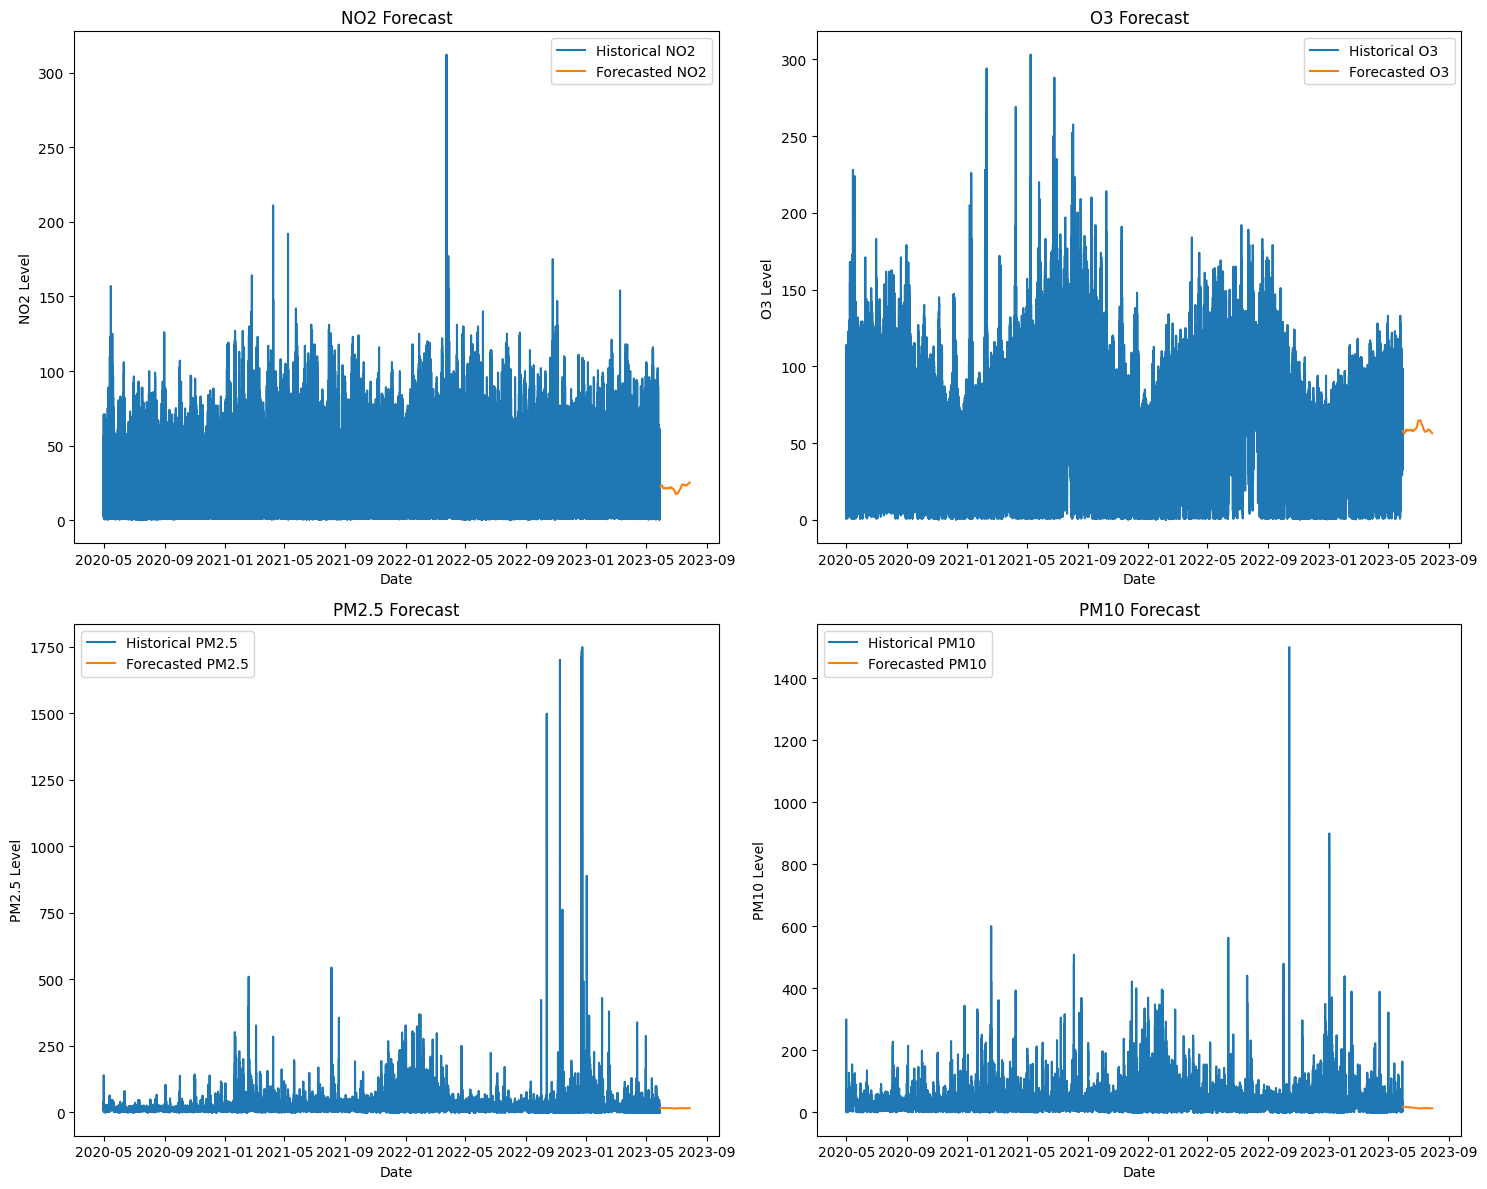

In [70]:
# Plot the forecasts for all pollutants
plt.figure(figsize=(15, 12))

# NO2
plt.subplot(2, 2, 1)
plt.plot(data.index, data['NO2'], label='Historical NO2')
plt.plot(future_dates, future_forecast[:, 0], label='Forecasted NO2')
plt.title('NO2 Forecast')
plt.xlabel('Date')
plt.ylabel('NO2 Level')
plt.legend()

# O3
plt.subplot(2, 2, 2)
plt.plot(data.index, data['O3'], label='Historical O3')
plt.plot(future_dates, future_forecast[:, 1], label='Forecasted O3')
plt.title('O3 Forecast')
plt.xlabel('Date')
plt.ylabel('O3 Level')
plt.legend()

# PM2.5
plt.subplot(2, 2, 3)
plt.plot(data.index, data['PM2.5'], label='Historical PM2.5')
plt.plot(future_dates, future_forecast[:, 2], label='Forecasted PM2.5')
plt.title('PM2.5 Forecast')
plt.xlabel('Date')
plt.ylabel('PM2.5 Level')
plt.legend()

# PM10
plt.subplot(2, 2, 4)
plt.plot(data.index, data['PM10'], label='Historical PM10')
plt.plot(future_dates, future_forecast[:, 3], label='Forecasted PM10')
plt.title('PM10 Forecast')
plt.xlabel('Date')
plt.ylabel('PM10 Level')
plt.legend()

plt.tight_layout()
plt.show()


In [71]:
# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame(future_forecast, columns=['NO2', 'O3', 'PM2.5', 'PM10'])
forecast_df['Date'] = future_dates
forecast_df.set_index('Date', inplace=True)

# Print the DataFrame
print(forecast_df)

# Save the DataFrame to a CSV file
forecast_df.to_csv('future_forecast.csv')


                           NO2         O3      PM2.5       PM10
Date                                                           
2023-05-30 23:00:00  22.743101  57.789747  16.007039  18.789483
2023-05-31 23:00:00  23.241750  57.139568  16.308001  18.713583
2023-06-01 23:00:00  23.389502  56.621278  16.412090  18.577383
2023-06-02 23:00:00  23.531963  56.157867  16.418624  18.458394
2023-06-03 23:00:00  22.723107  57.092581  16.431793  18.075234
2023-06-04 23:00:00  21.978299  58.058642  16.501895  17.753945
2023-06-05 23:00:00  21.313075  58.905785  16.702143  17.573730
2023-06-06 23:00:00  21.717671  58.180111  16.594399  17.501895
2023-06-07 23:00:00  21.498654  58.384303  16.525205  17.300859
2023-06-08 23:00:00  21.356240  58.548090  16.507238  17.125685
2023-06-09 23:00:00  21.450250  58.515967  16.506764  17.000738
2023-06-10 23:00:00  21.597175  58.419199  16.515500  16.888633
2023-06-11 23:00:00  21.693001  58.276771  16.474124  16.744933
2023-06-12 23:00:00  21.629542  58.35618

In [72]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for training and test sets
train_mae = mean_absolute_error(y_train_inv, train_predict)
test_mae = mean_absolute_error(y_test_inv, test_predict)

print(f'Train MAE: {train_mae:.2f}')
print(f'Test MAE: {test_mae:.2f}')


Train MAE: 9.33
Test MAE: 9.33


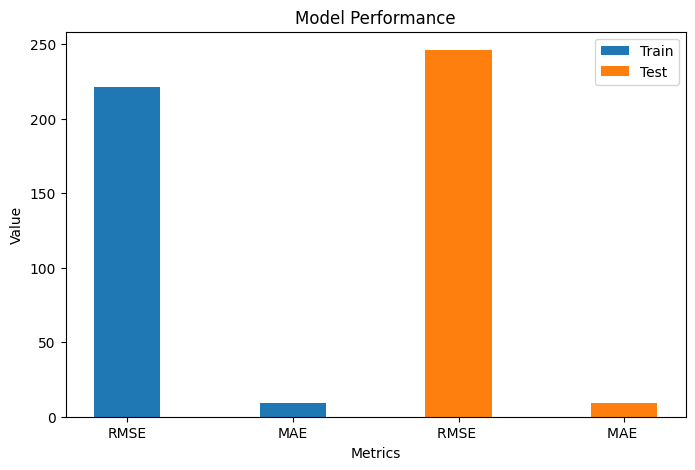

In [73]:
train_rmse = train_score
test_rmse =test_score

train_mae = mean_absolute_error(y_train_inv, train_predict)
test_mae = mean_absolute_error(y_test_inv, test_predict)

# Visualize metrics
metrics = ['RMSE', 'MAE']
train_values = [train_rmse, train_mae]
test_values = [test_rmse, test_mae]

plt.figure(figsize=(8, 5))
plt.bar(metrics, train_values, width=0.4, label='Train')
plt.bar([m + ' ' for m in metrics], test_values, width=0.4, label='Test')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Model Performance')
plt.legend()
plt.show()
